**About income dataset**

This dataset has 48842 values and 15 features.Here 'Income' is the target variable. Here we have to predict income of an individual that whether it is less than or equal to 50K or greater than 50K depending upon varios features.This dataset contains 14 quantitative feature and 1 qualitative feature.

Purpose of analysis of this dataset is to get reliable feature picture of country.This dataset is extracted from the 1994 census bureau database By Ronny Kohavi and Barry Becker.

#Upload the dataset#

In [ ]:
 from google.colab import files
a = files.upload()

Saving adult.csv to adult (1).csv


#Import the Libraries#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#import the dataset
data = pd.read_csv('adult.csv')

In [ ]:
data.head() #shows first 5 rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.tail() #shows last 5 rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data.info() # gives the information about columns datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


There are 6 numerical columns. And there are 8 categorical columns.

In [ ]:
pd.set_option('display.float_format',lambda x:'%.3f'%x)

In [ ]:
data.describe() # To get the knowledge about descritive  statistics of data  , it will only tells about numerical column

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000,48842.000,48842.000,48842.000,48842.000,48842.000
mean,38.644,189664.135,10.078,1079.068,87.502,40.422
std,13.711,105604.025,2.571,7452.019,403.005,12.391
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117550.500,9.000,0.000,0.000,40.000
50%,37.000,178144.500,10.000,0.000,0.000,40.000
75%,48.000,237642.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,4356.000,99.000


All the columns which were numeric there mean ,standard deviation ,min ,max values and all other values are dislayed here for e.g we can see that for age count is of 48842 ( that is though same for all numerical columns.) and mean value is 38.64 std is of 13.710 , min and max value is at 17.0 and 90.0 repectively. There 25%, 50% and 75% values are 28,37and 48. Likewie we can see it for other columns too.

In [ ]:
data.shape

(48842, 15)

It is having 48842 data entires and 15 features are there.

In [ ]:
# To check that if there is some null values out there or not if yes then which columns do have null values.
null_value_columns = []
for i in data.columns:
  if data[i].isnull().any() == True:
    null_value_columns.append(i)
null_value_columns

[]

It is clearly showing me that there is no null values but as when we displayed the dataset there were some $'?'$ out there these $'?'$ are null values so first see how it is affecting our data then we will try to remove it.

#Univariate analysis#

**AGE**

(array([8432., 8686., 9120., 9157., 5965., 3876., 2456.,  777.,  277.,
          96.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

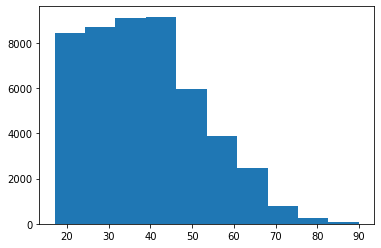

In [ ]:
plt.hist(data['age'])

We can infer from this graph that data is skewed right.

{'boxes': [<matplotlib.lines.Line2D at 0x7ff532785650>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff53270c750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff532711790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff532711250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff532785c90>,
  <matplotlib.lines.Line2D at 0x7ff53270c210>]}

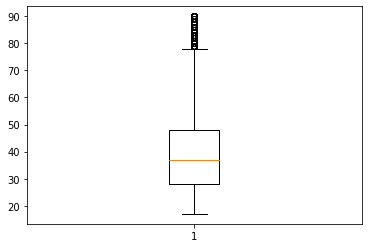

In [ ]:
plt.boxplot(data['age'])

Outliers are present out there which is above the maximum (Q3 + 1.5 x IQR) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


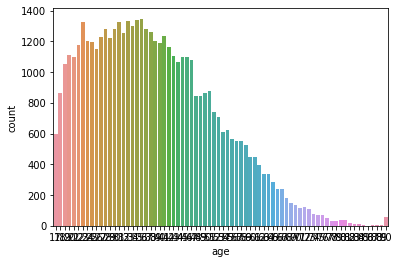

In [ ]:
sns.countplot(data['age'])

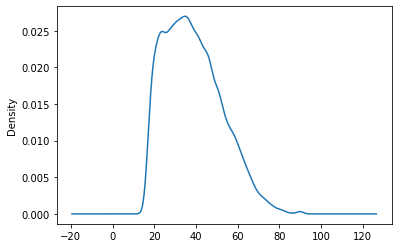

In [ ]:
data['age'].plot.kde()

It is having long tail at positive side so it is positively skewed normal distribution. 

---



**fnlwgt**

(array([1.9939e+04, 2.2790e+04, 5.2250e+03, 6.7300e+02, 1.5100e+02,
        3.5000e+01, 1.5000e+01, 7.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([  12285. ,  160096.5,  307908. ,  455719.5,  603531. ,  751342.5,
         899154. , 1046965.5, 1194777. , 1342588.5, 1490400. ]),
 <a list of 10 Patch objects>)

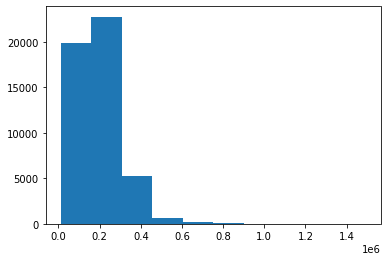

In [ ]:
plt.hist(data['fnlwgt'])

This plot tell us that data points are heavily skewed in one part  max range of value is in 0.2 to 0.3

{'boxes': [<matplotlib.lines.Line2D at 0x7ff528368250>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff52836f310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff528378350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff52836fdd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff528368850>,
  <matplotlib.lines.Line2D at 0x7ff528368d90>]}

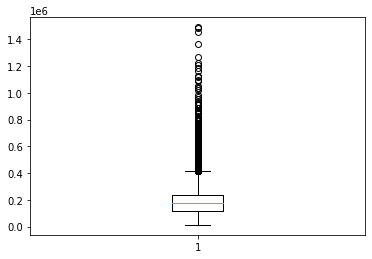

In [ ]:
plt.boxplot(data['fnlwgt'])

Heavy outliers are there above "maximum".

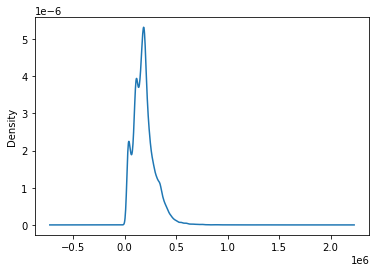

In [ ]:
data['fnlwgt'].plot.kde()

Disrupted head signifies presence of outlier somewhat long tail at positive side suggest that it is right skewed.

**Hours-per-week**

(array([ 1125.,  3328.,  3398., 26639.,  4671.,  5828.,  2642.,   683.,
          315.,   213.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

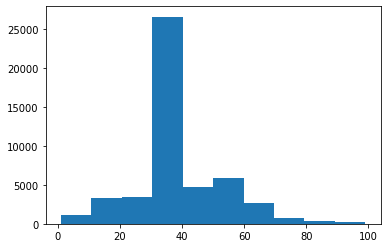

In [ ]:
plt.hist(data['hours-per-week'])

This graph tells us  that max study hours is 30-40. This is symmteric plot.

{'boxes': [<matplotlib.lines.Line2D at 0x7ff5281cb350>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff5281d0410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5281d9450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5281d0ed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff5281cb950>,
  <matplotlib.lines.Line2D at 0x7ff5281cbe90>]}

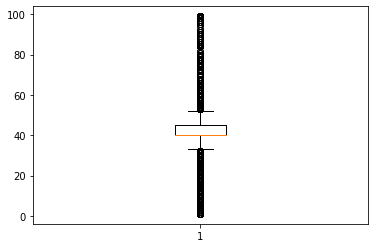

In [ ]:
plt.boxplot(data['hours-per-week'])

There are outliers present on both side , minimum and maximum both contains these outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


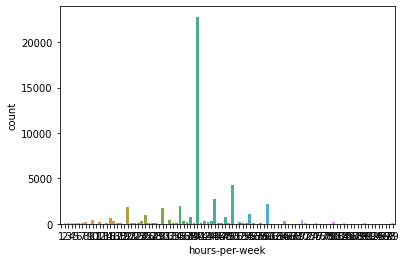

In [ ]:
sns.countplot(data['hours-per-week'])

Peak value is at 30-40 rest values are very small.

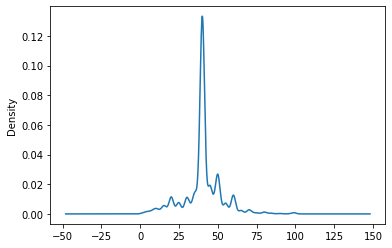

In [ ]:
data['hours-per-week'].plot.kde()

As in the aboves graphs it is seen that there is peak at only one range i.e. mostly people give 30-40 hours in a week. Rest ranges have very small number of values that's why this distribution is so much distorted.

**capital-gain**

(array([4.7708e+04, 7.5300e+02, 1.2800e+02, 6.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4400e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

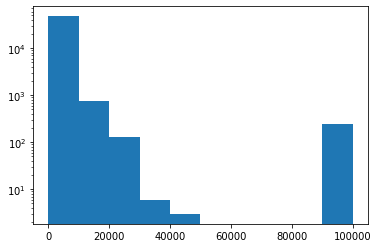

In [ ]:
plt.hist(data['capital-gain'],log= True)

This shows that there is very few large values that skew our distribution of captial gain . That is there is some people whose capital gain is very much.

{'boxes': [<matplotlib.lines.Line2D at 0x7ff527e2b5d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff527dc5f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff527c9e150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff527f68d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff527dc5550>,
  <matplotlib.lines.Line2D at 0x7ff527dc5a10>]}

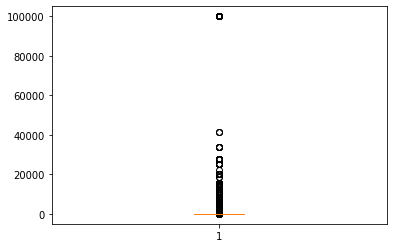

In [ ]:
plt.boxplot(data['capital-gain'])

Very large outliers values are present.

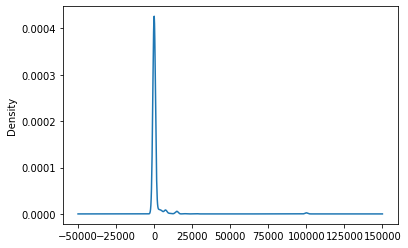

In [ ]:
data['capital-gain'].plot.kde()

Normal distribution with skeweness

**Capital-loss**

(array([4.6574e+04, 2.3000e+01, 2.9000e+01, 7.0600e+02, 1.1690e+03,
        3.0700e+02, 2.1000e+01, 2.0000e+00, 8.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

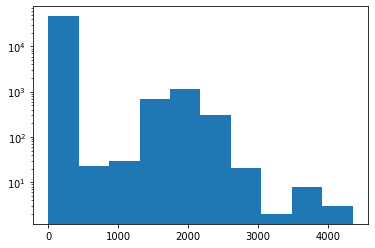

In [ ]:
plt.hist(data['capital-loss'],log= True)

There are very few outliers which make our plot non-symmetric.

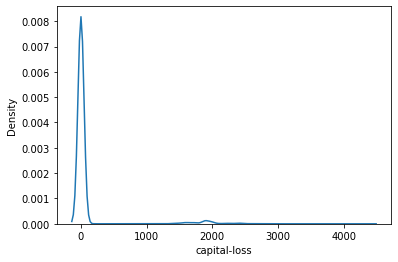

In [ ]:
sns.kdeplot(data['capital-loss'])

Somewhat similar as capital gain. Normally Distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


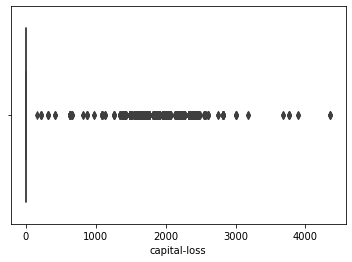

In [ ]:
sns.boxplot(data['capital-loss'])

Presence of Outliers signifies.

#Categorical data#

**Workclass**

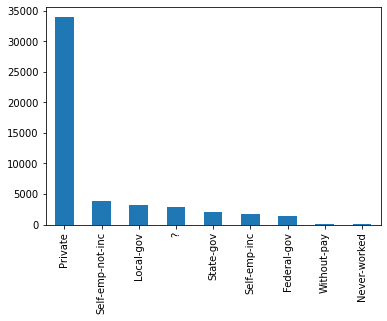

In [ ]:
data['workclass'].value_counts().plot(kind='bar')

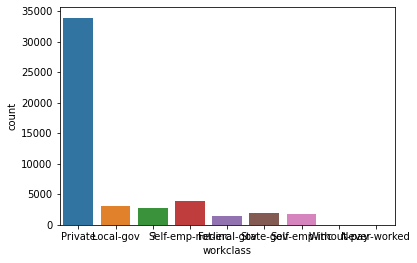

In [ ]:
sns.countplot(x='workclass',data=data)


([<matplotlib.patches.Wedge at 0x7ff526600e90>,
 [Text(-0.6302351126595461, 0.9015562671131567, 'Private'),
  Text(-0.11223213075455031, -1.0942595436304376, 'Self-emp-not-inc'),
  Text(0.37503238385951837, -1.0340941499963372, 'Local-gov'),
  Text(0.7332806449619423, -0.8199387146148169, '?'),
  Text(0.9470372130749412, -0.5595717264580554, 'state-gov'),
  Text(1.051766560466244, -0.3221600569359998, 'self-emp-inc'),
  Text(1.094924909088478, -0.10554356189549524, 'federal-gov'),
  Text(1.0999961744829398, -0.0029010554799851185, 'without-pay'),
  Text(1.0999997723494193, -0.0007076943026333262, 'never-worked')])

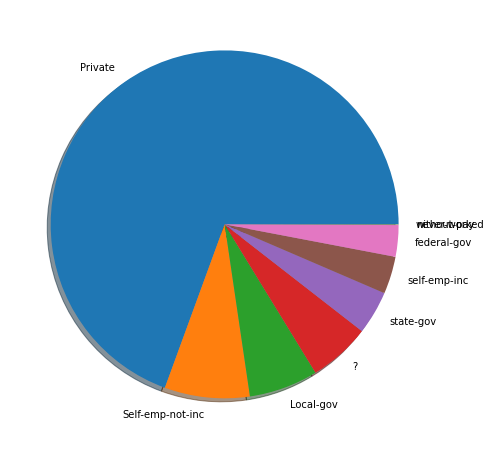

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(data['workclass'].value_counts(),labels=['Private','Self-emp-not-inc','Local-gov','?','state-gov','self-emp-inc','federal-gov','without-pay','never-worked'],shadow=True)

* There are 9 categories in Workclass column.
* Private has maximum working people out there.
* Very less number of people never worked.
* There is some ? - missing values.
* There is huge imbalance. 

**Education**

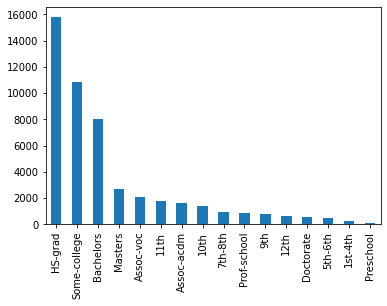

In [ ]:
data['education'].value_counts().plot(kind='bar')

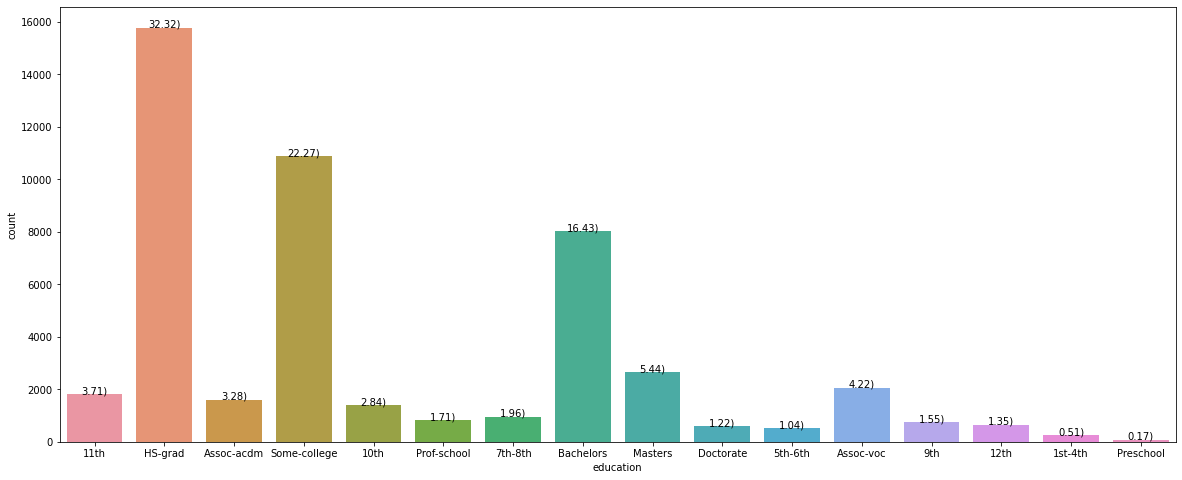

In [ ]:
plt.figure(figsize=(20,8))

total = float(len(data['income']))
ax= sns.countplot(x='education',data=data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,height+3,'{:1.2f})'.format((height/total)*100),ha='center')

* 16 unique categories are here.
* Most of the peole are HS-GRAD.
* Followed by some college and bachelors.
* Pre school has min sample.

#MARITAL-STATUS#

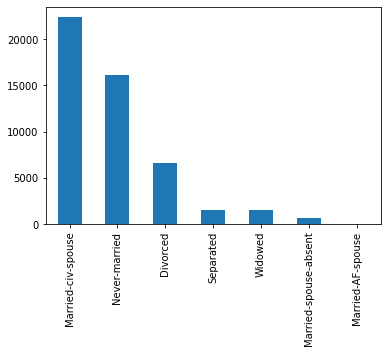

In [ ]:
data['marital-status'].value_counts().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7ff5265dc110>,
 [Text(0.1440639820315471, 1.090525363795457, 'Maried-civ-spouse'),
  Text(-0.7866469415863735, -0.768886590657429, 'Never-married'),
  Text(0.6800625729587079, -0.8645894383236371, 'divorced'),
  Text(1.0218409979206042, -0.4072357731936424, 'separated'),
  Text(1.0815948035851295, -0.2003813385963014, 'widowed'),
  Text(1.0988788207782532, -0.04965216254098036, 'married-spouse-absent'),
  Text(1.0999968849806534, -0.002617829799559582, 'married-af-spouse')])

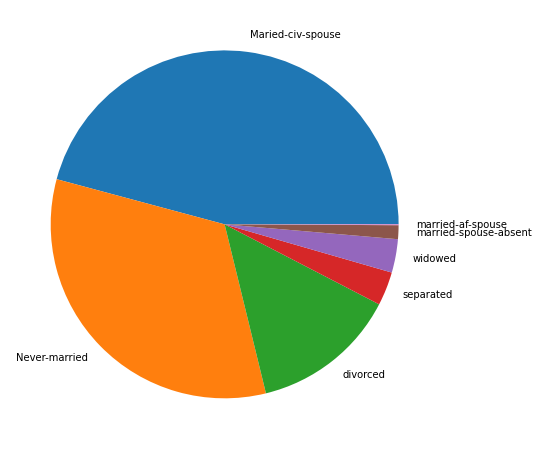

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(data['marital-status'].value_counts(),labels=['Maried-civ-spouse','Never-married','divorced','separated','widowed','married-spouse-absent','married-af-spouse'])

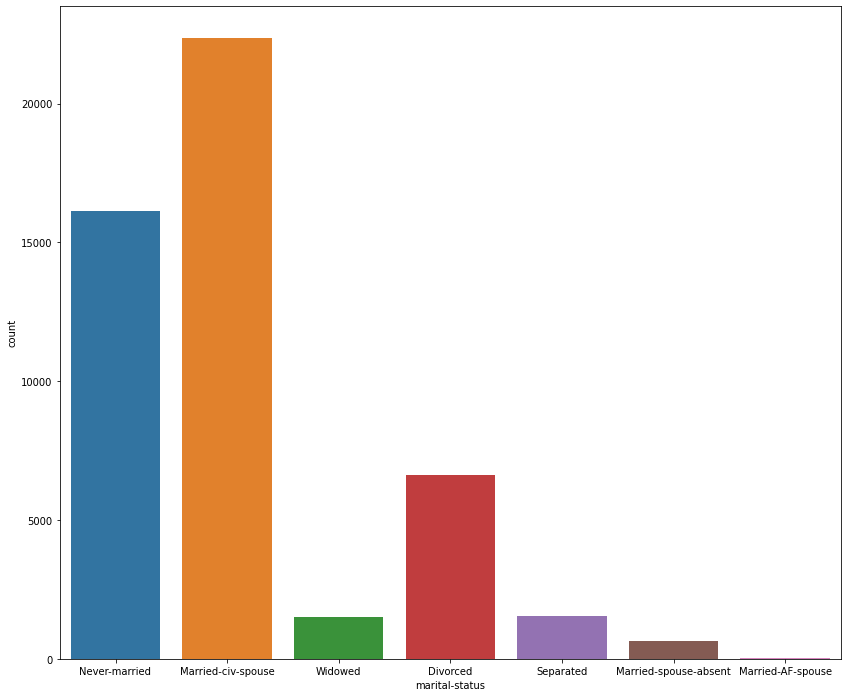

In [ ]:
plt.figure(figsize=(14,12))
sns.countplot(x='marital-status',data=data)

* Have 7 unique categories
* Most of the person are married-civ-spouse followed by never married.
* Very less number of people are married-af-spouse

#OCCUPATION#

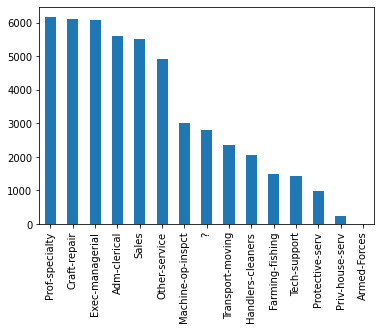

In [ ]:
data['occupation'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


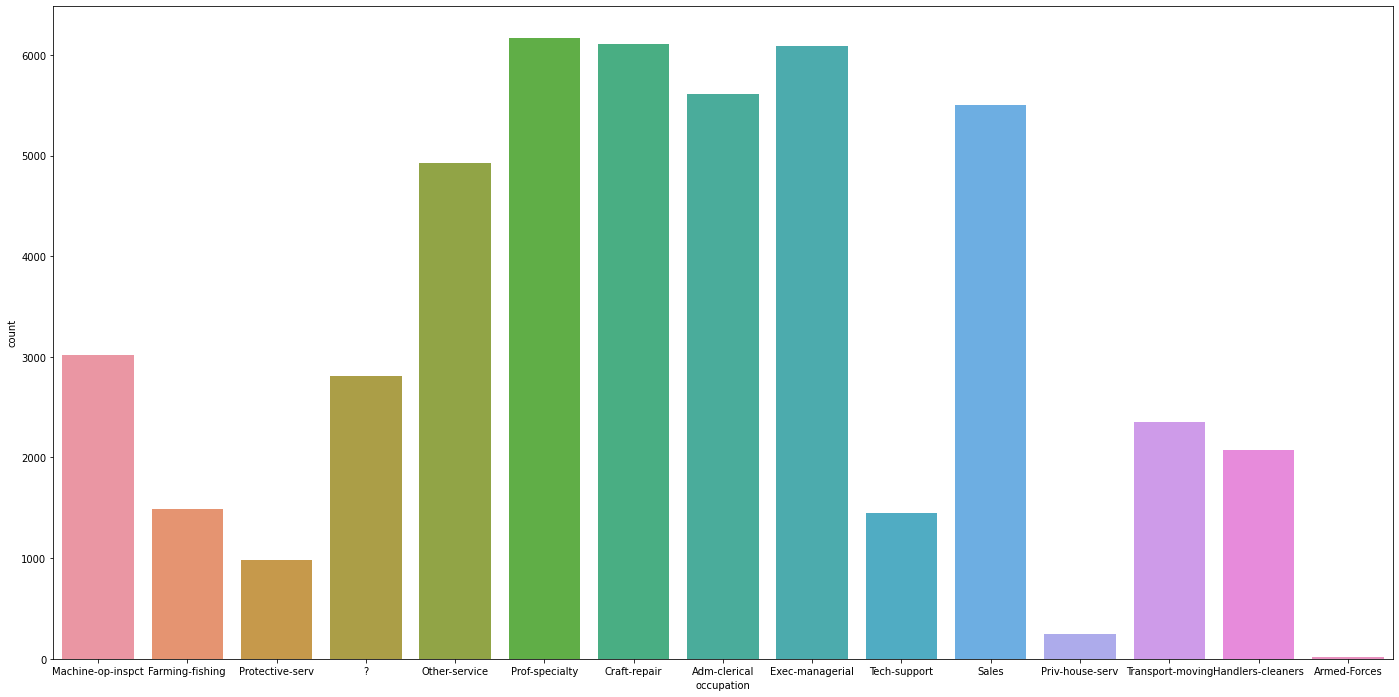

In [ ]:
plt.figure(figsize=(24,12))
sns.countplot(data['occupation'])

* OCCUPATION feature have 14 unique categories.
* Mostly people are prof-speciality,craft repair, exec-managerial followed by adm-aerical and sales.
* armed forces have min. no. 

#RELATIONSHIP#

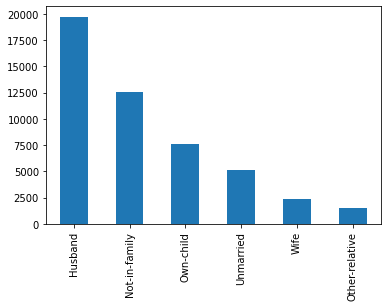

In [ ]:
data['relationship'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


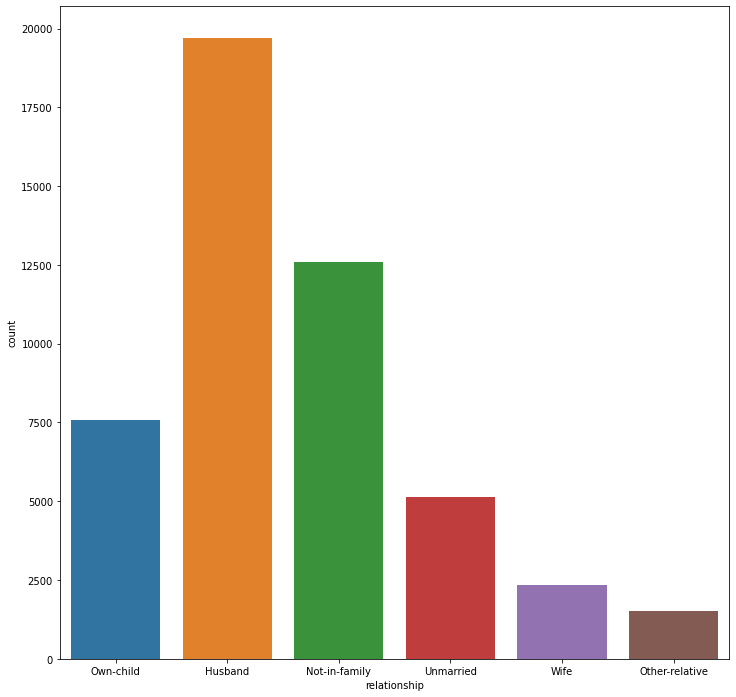

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(data['relationship'])

([<matplotlib.patches.Wedge at 0x7ff5261025d0>,
 [Text(0.3278378877895517, 1.0500106281984414, 'husband'),
  Text(-1.0771699188832506, -0.22294610526549144, 'not-in-family'),
  Text(-0.07663497694740966, -1.097327243946978, 'Own-child'),
  Text(0.74782432530922, -0.8066962120128061, 'unmarried'),
  Text(1.035676836921437, -0.37063929832710324, 'wife'),
  Text(1.0948431250383803, -0.10638858752795698, 'other-relative')])

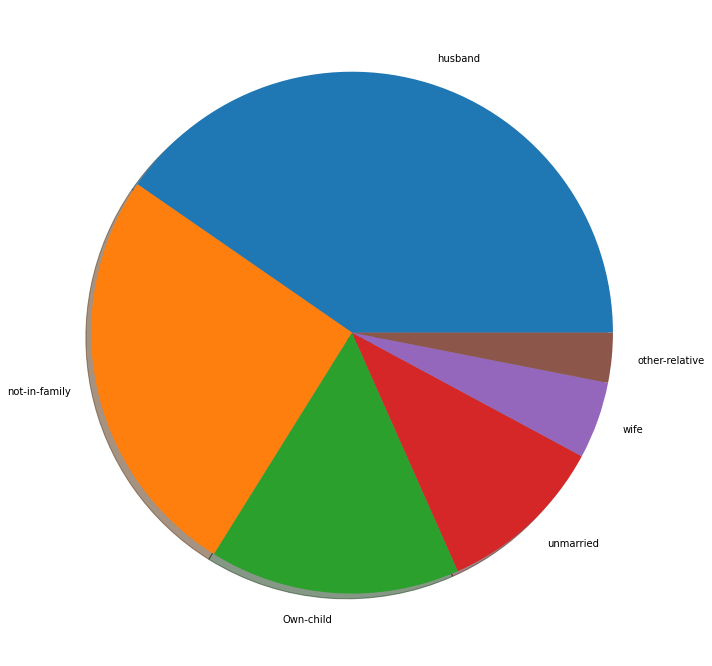

In [ ]:
plt.figure(figsize=(12,12))
plt.pie(data['relationship'].value_counts(),labels=['husband','not-in-family','Own-child','unmarried','wife','other-relative'],shadow=True)

* Relation has 6 unique categories
* Most of the working people are husband in relation followed by people who are not in family.
* Ver less number of people are other-relative and wife

#RACE#

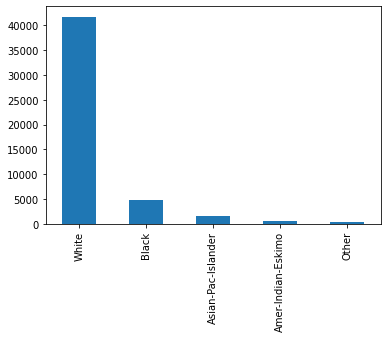

In [ ]:
data['race'].value_counts().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7ff526069350>,
 [Text(-0.9878954172450574, 0.4838002114367193, 'white'),
  Text(0.9019615167343396, -0.6296550026246833, 'black'),
  Text(1.0757432120648598, -0.22973145560932262, 'asian-pac-islander'),
  Text(1.0962623063622776, -0.09060328718793965, 'amer-indian-eskimo'),
  Text(1.0996249429929532, -0.0287225477237747, 'other')])

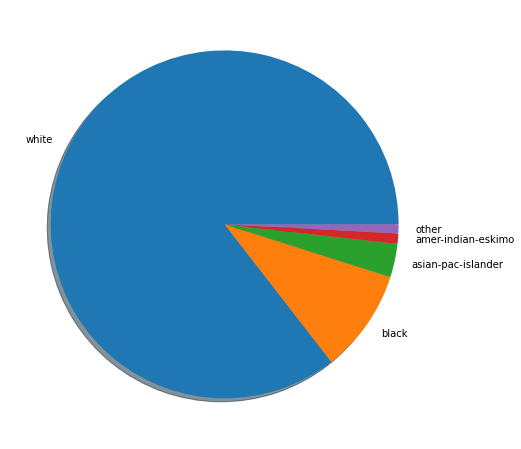

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(data['race'].value_counts(),labels=['white','black','asian-pac-islander','amer-indian-eskimo','other'],shadow= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


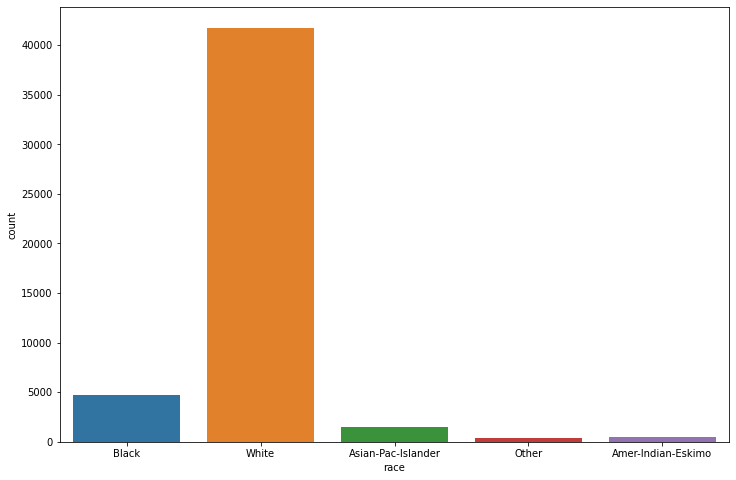

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data['race'])

* Race has 5 unique values
* Most of the people are 'white'.
* Followed by 'black'.
* 'Other' and 'Amer-indian-eskimo' race people are very less in this dataset

#GENDER#

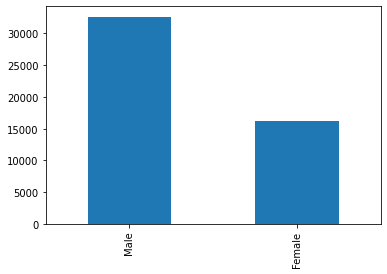

In [ ]:
data['gender'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


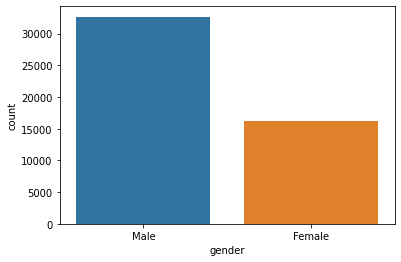

In [ ]:
sns.countplot(data['gender'])

([<matplotlib.patches.Wedge at 0x7ff525e82a10>,
 [Text(-0.5554240940186325, 0.949475684672115, 'male'),
  Text(0.5554241829149587, -0.9494756326695545, 'female')])

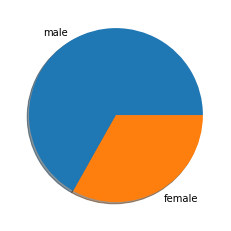

In [ ]:
plt.pie(data['gender'].value_counts(),labels=['male','female'],shadow=True)

* Gender features have two classes male and female.
* This dataset is male-skewed as most of the people's are male.

#NATIVE-COUNTRY#

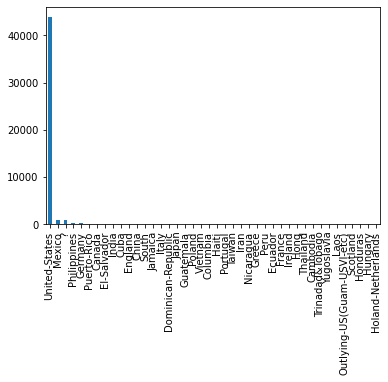

In [ ]:
data['native-country'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


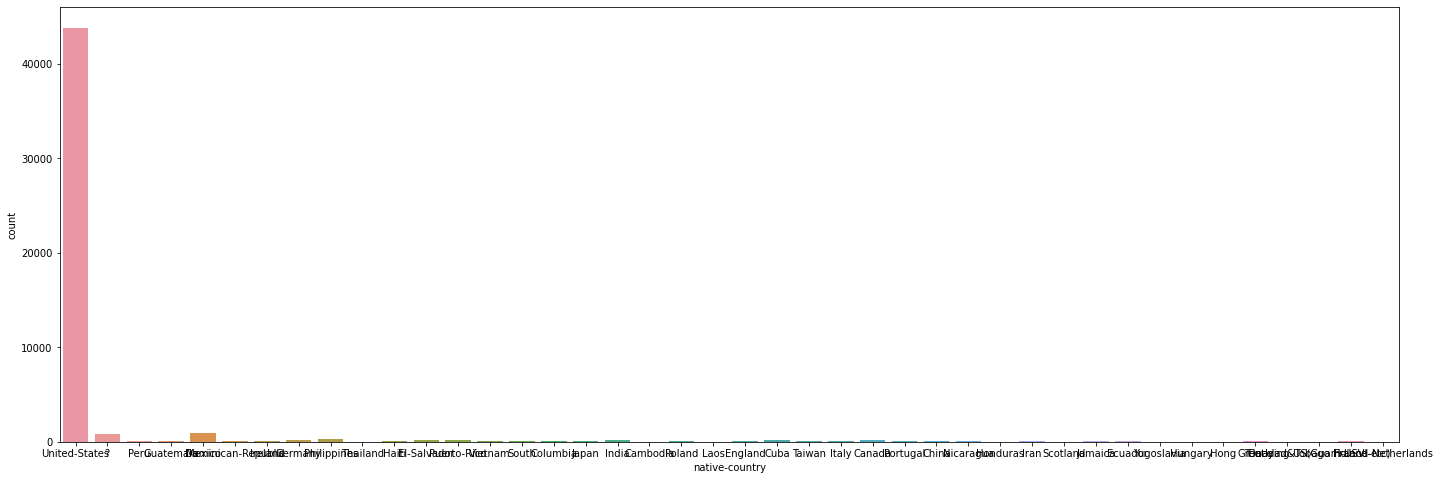

In [ ]:
plt.figure(figsize=(24,8))
sns.countplot(data['native-country'])

* This dataset is taken from US.

* Mexico, Germany and Philipines data's are also there.



#INCOME-Target feature#

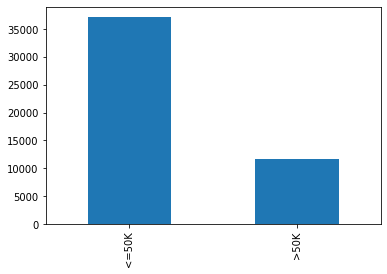

In [ ]:
data['income'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


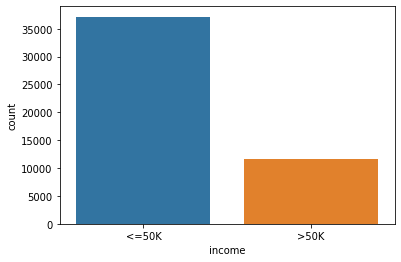

In [ ]:
sns.countplot(data['income'])

([<matplotlib.patches.Wedge at 0x7ff525b07190>,
 [Text(-0.8035625018699238, 0.7511905920527419, '<=50k'),
  Text(0.8035624667041534, -0.7511906296702167, '>50k')])

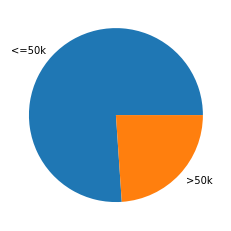

In [ ]:
plt.pie(data['income'].value_counts(),labels=['<=50k','>50k'])

* Income has 2 values '<=50k'and '>50k'
* Most of the population earns less than or equal to 50K.

#**BIVARIATE ANALYSIS**#

Here we are going to analyse each features against our other feature

 AGE VS FNLWGT

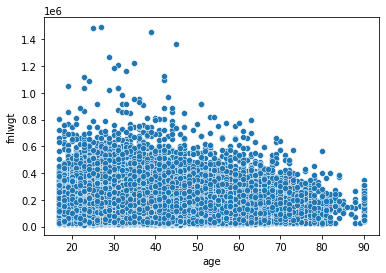

In [ ]:
sns.scatterplot(x='age',y='fnlwgt',data=data )

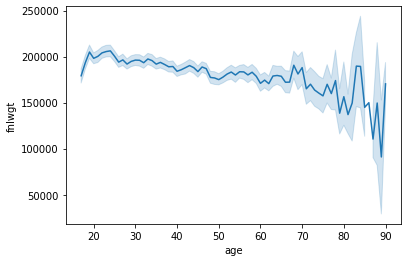

In [ ]:
sns.lineplot(x='age',y='fnlwgt',data=data )

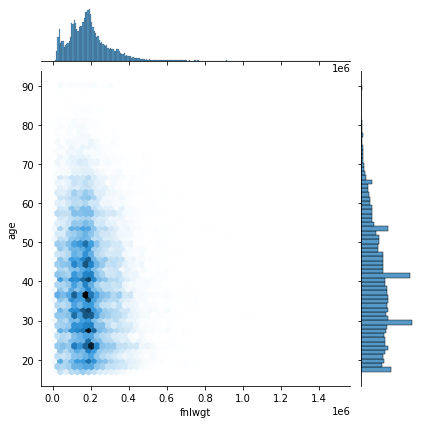

In [ ]:
sns.jointplot(x='fnlwgt',y='age',kind='hex',data=data )

Sampling weight and age is highly correlated for younger age it tell us two fact either older age people that is above 70 is very less in our dataset or sampling weight of younger age is high.

AGE VS HOURS -PER- WEEK

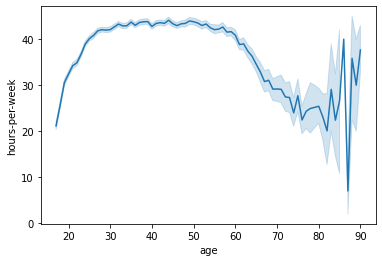

In [ ]:
sns.lineplot(x='age',y='hours-per-week',data=data )

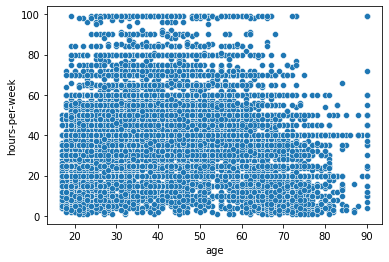

In [ ]:
sns.scatterplot(x='age',y='hours-per-week',data=data )

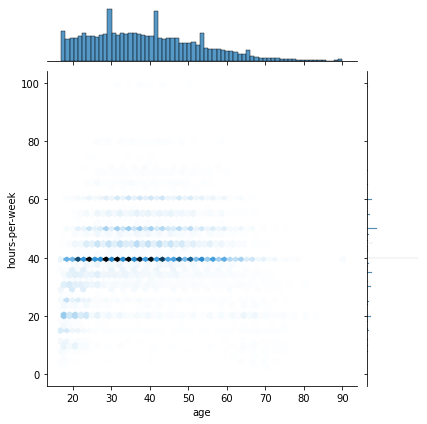

In [ ]:
sns.jointplot(x='age',y='hours-per-week',data=data,kind='hex')

Age and hours per week are highly correlated.

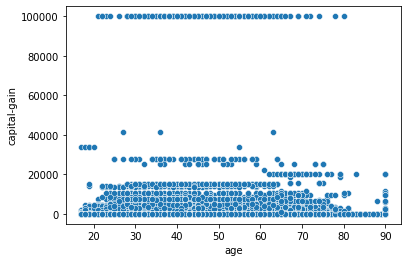

In [ ]:
sns.scatterplot(x='age',y='capital-gain',data=data )

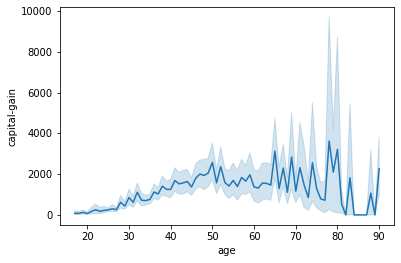

In [ ]:
sns.lineplot(x='age',y='capital-gain',data=data )

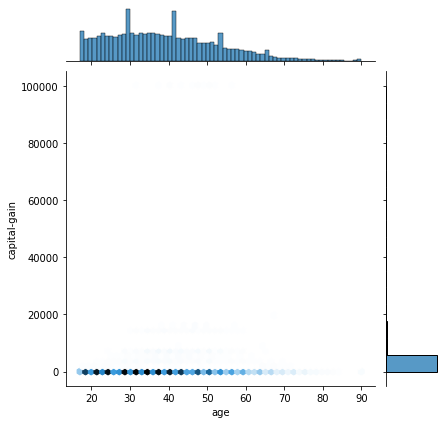

In [ ]:
sns.jointplot(x='age',y='capital-gain',data=data,kind='hex')

Age and captial gain are not as much correlated.

AGE VS CAPITAL-LOSS

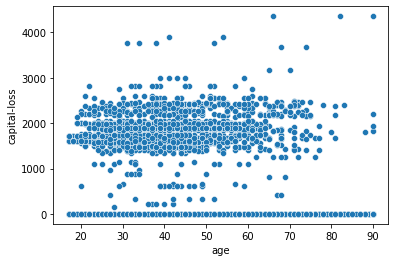

In [ ]:
sns.scatterplot(x='age',y='capital-loss',data=data )

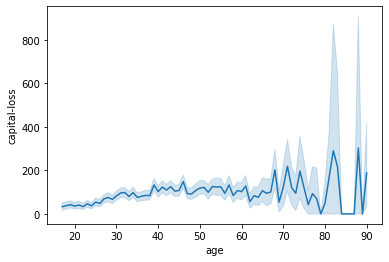

In [ ]:
sns.lineplot(x='age',y='capital-loss',data=data )

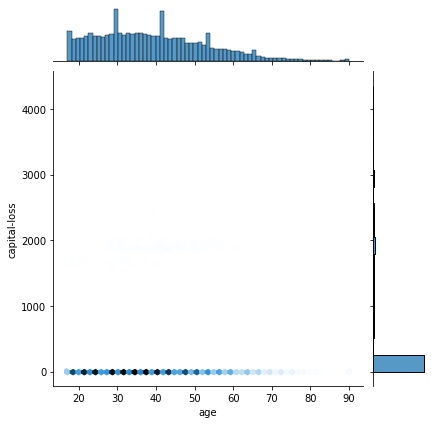

In [ ]:
sns.jointplot(x='age',y='capital-loss',data=data,kind='hex' )

Not as much correlated.

CAPITAL-GAIN VS HOURS PER WEEK

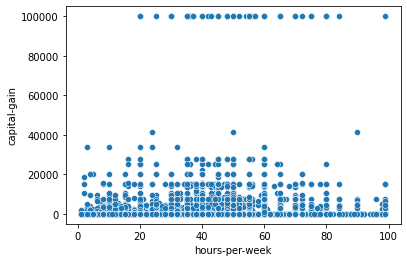

In [ ]:
sns.scatterplot(y='capital-gain',x='hours-per-week',data=data )

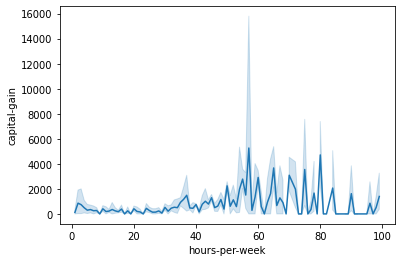

In [ ]:
sns.lineplot(x='hours-per-week',y='capital-gain',data=data )

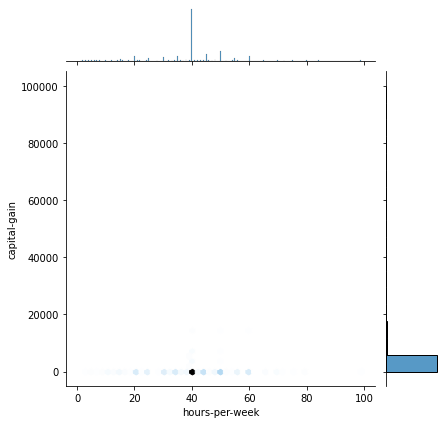

In [ ]:
sns.jointplot(x='hours-per-week',y='capital-gain',data=data,kind='hex' )

For more hours per week also capital gain is not changing much.

HOURS-PER-WEEK vs Capital loss

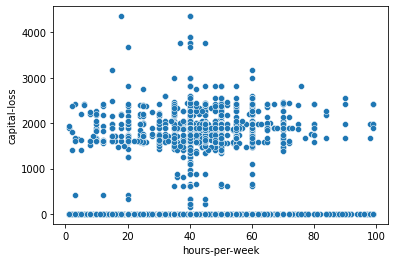

In [ ]:
sns.scatterplot(x='hours-per-week',y='capital-loss',data=data )

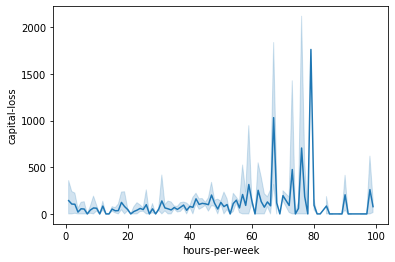

In [ ]:
sns.lineplot(x='hours-per-week',y='capital-loss',data=data )

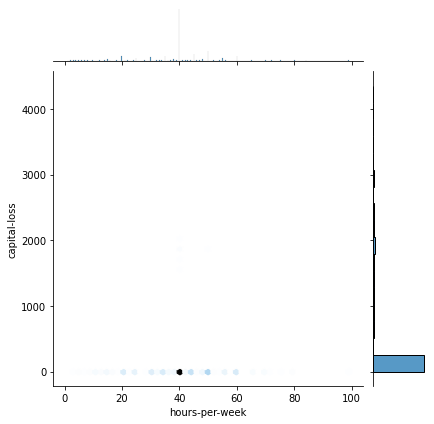

In [ ]:
sns.jointplot(x='hours-per-week',y='capital-loss',data=data,kind='hex' )

MOstly same relation as hours-per-week have with capital gain.

CAPITAL-GAIN VS CAPITAL-LOSS

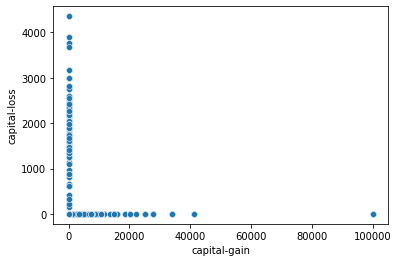

In [ ]:
sns.scatterplot(x='capital-gain',y='capital-loss',data=data )

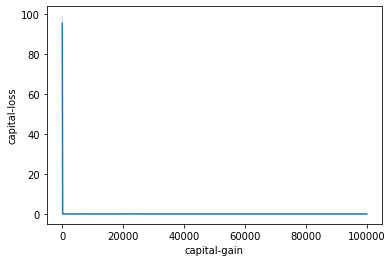

In [ ]:
sns.lineplot(x='capital-gain',y='capital-loss',data=data )

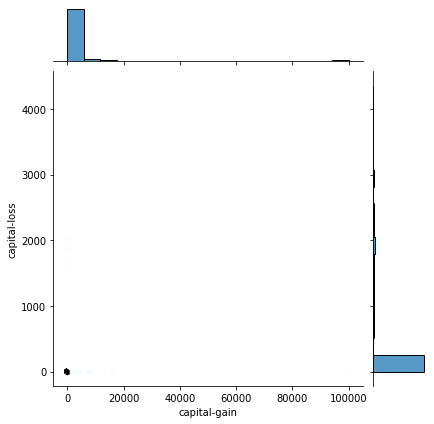

In [ ]:
sns.jointplot(x='capital-gain',y='capital-loss',data=data ,kind='hex')

Here we can say that if capital gain is zero than capital loss is also zero or if capital gain is zero capital -loss is high or if capital loss is zero capital gain is high. 

Workclass Vs age

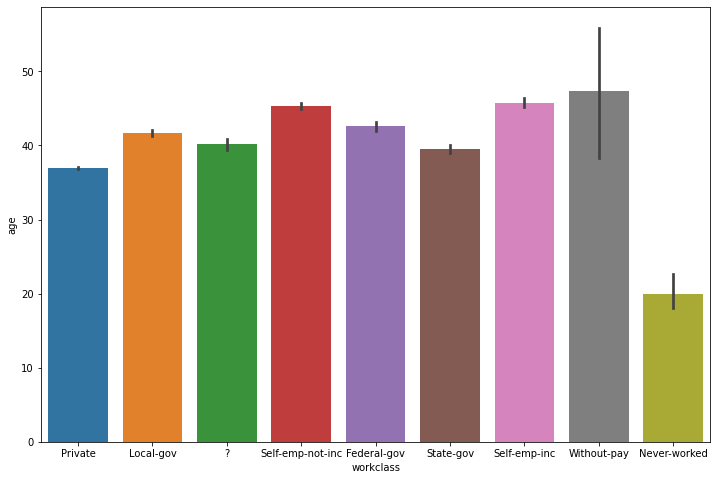

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='workclass',y='age',data=data )

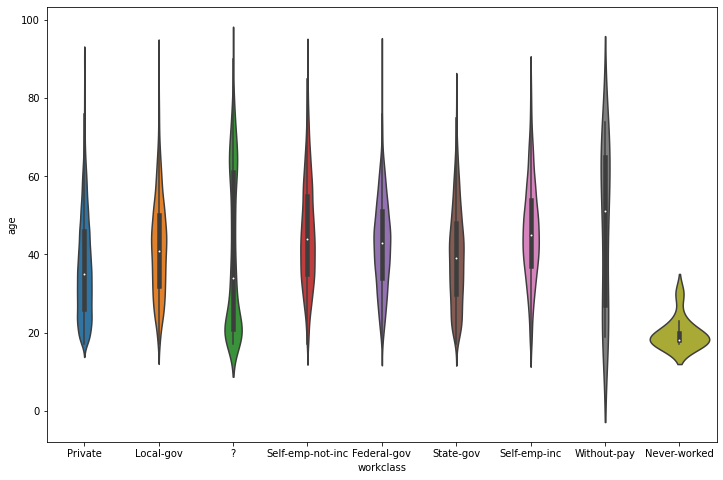

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='workclass',y='age',data=data )

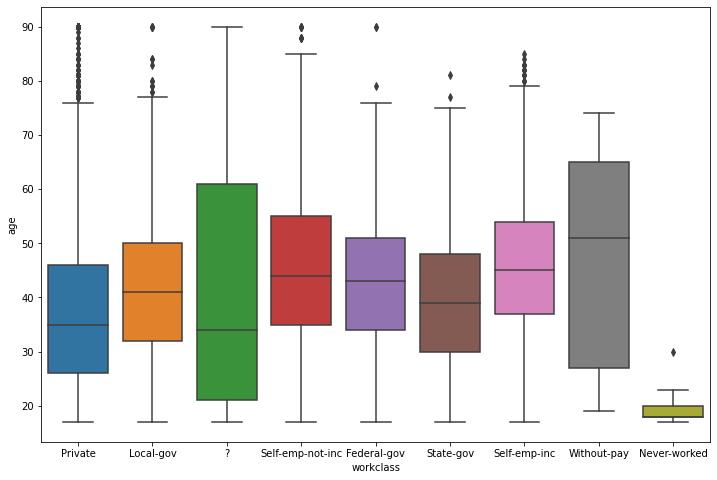

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='workclass',y='age',data=data )

* Aged people are without pay.
* There are outliers Private workclass,Local- gov , Federal -gov , state-gov, self-emp-inc.
* Below 20 people are in never worked class.

Education vs age

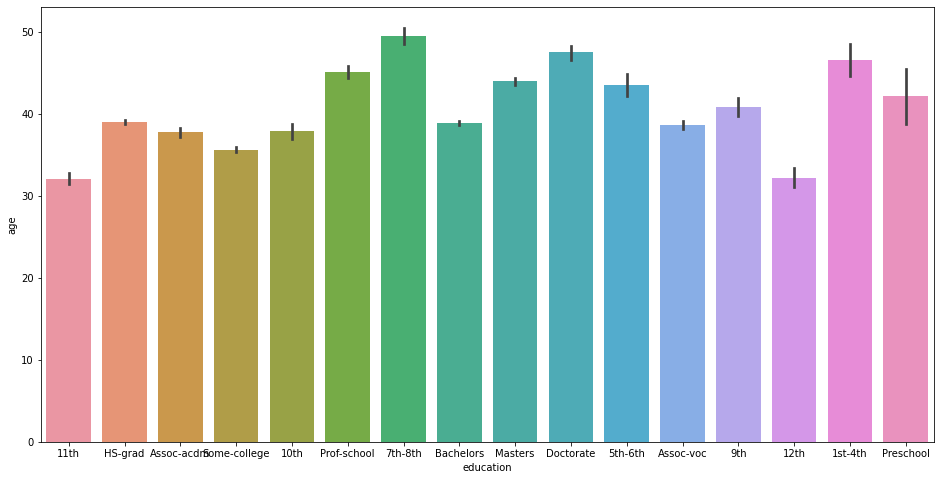

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='education',y='age',data=data )

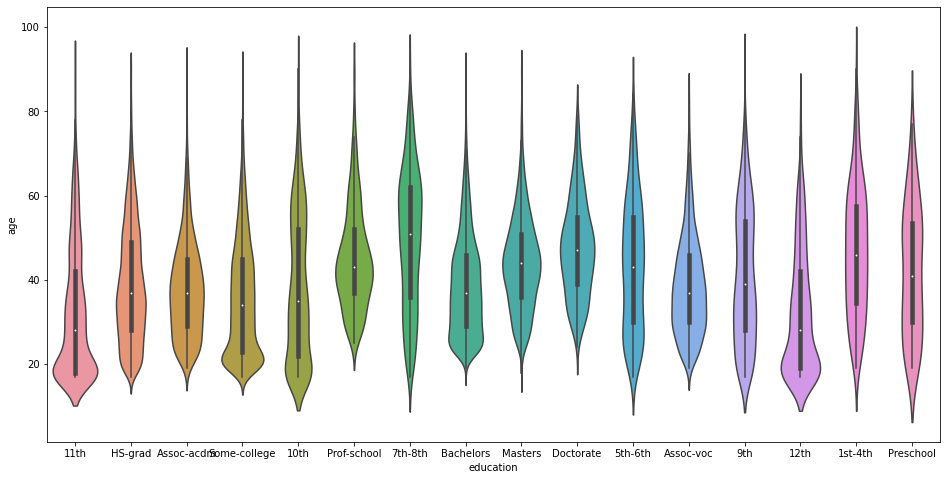

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x='education',y='age',data=data )

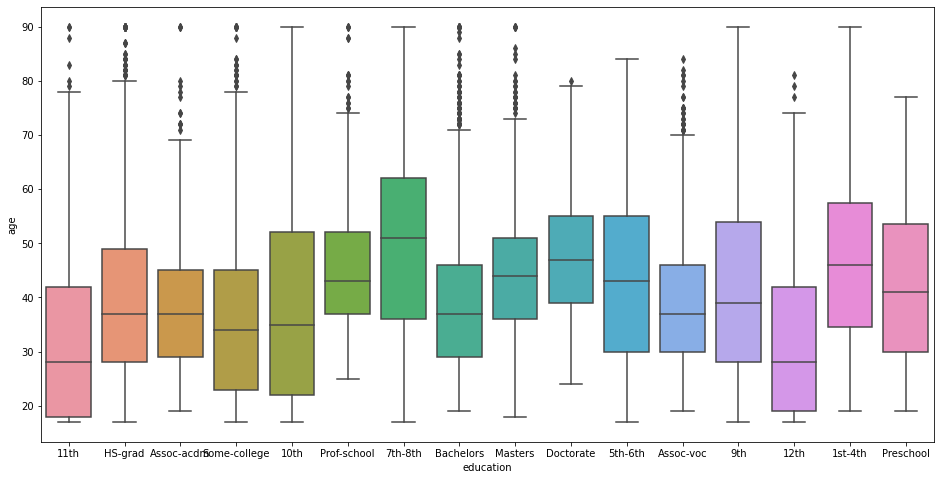

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='education',y='age',data=data )

* Some people are above 40 but there education qualification is just pre-school.
* Like wise we have people from 7th-8th qualified too.
*This tells us that there are some aged- people who is not as much qualified.
* There are outliers too in some categories.

MARTIAL -STATUS VS AGE


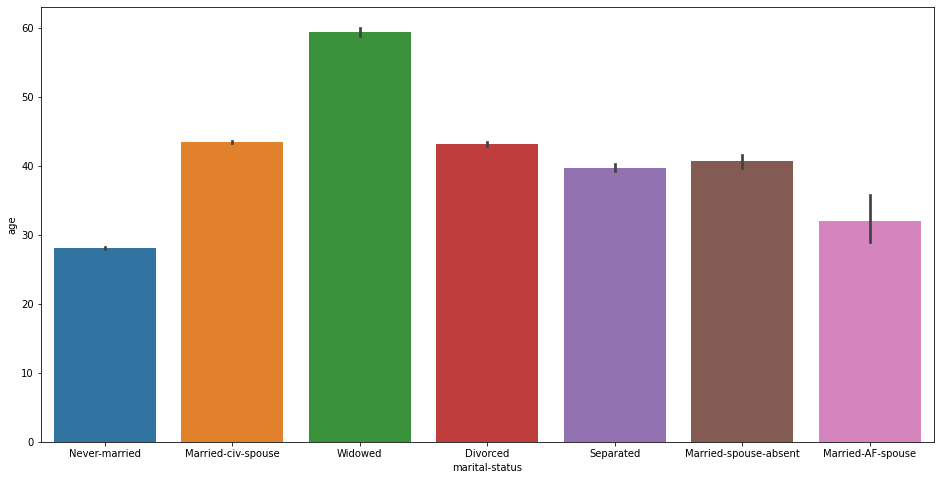

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='marital-status',y='age',data=data )

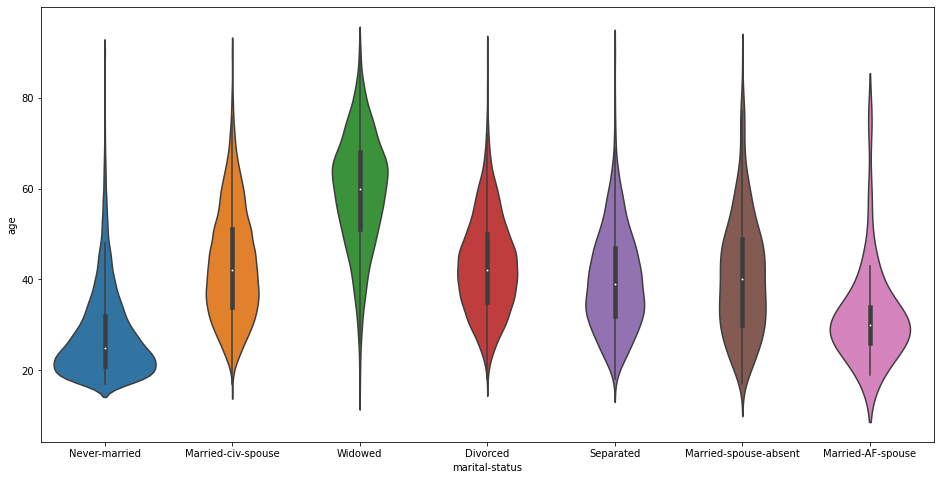

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x='marital-status',y='age',data=data )

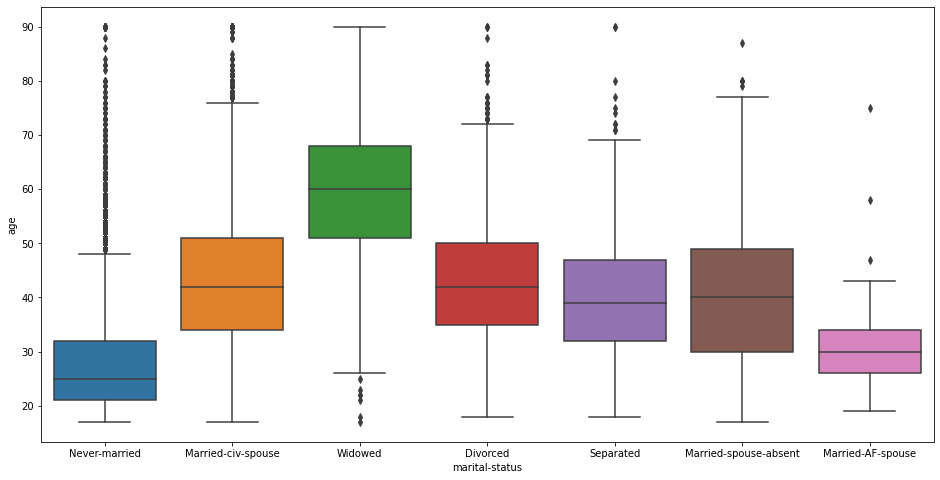

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='marital-status',y='age',data=data )

* People around 60 are widowed.
* People less than 30 are never-married.
* In the age group of 30-40 people are either divorced or separated.
* Outliers are present in each category.

OCCUPATION VS AGE

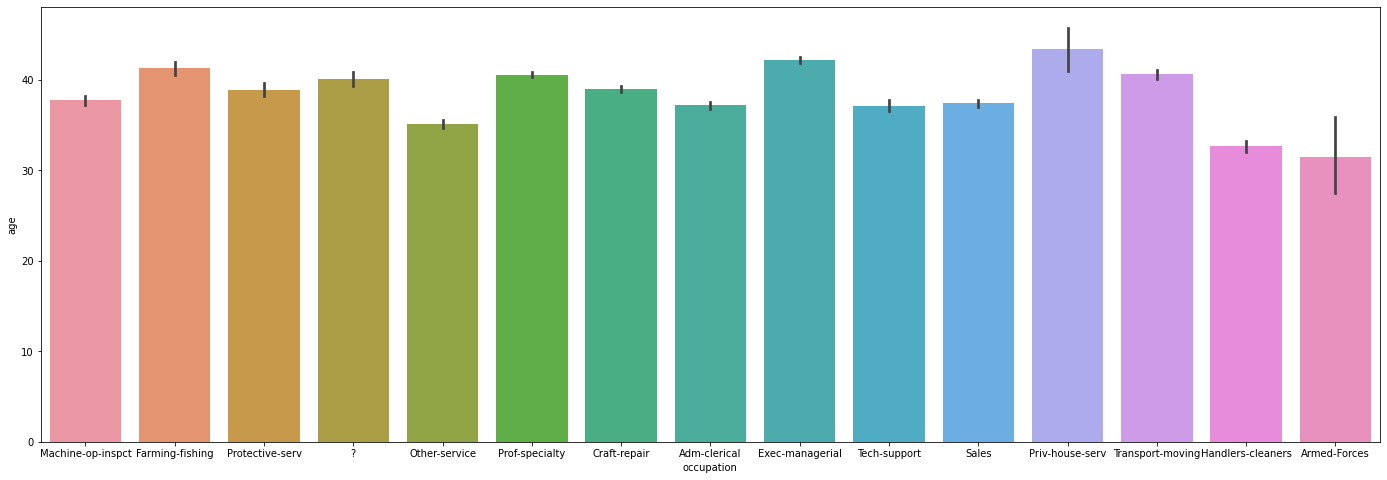

In [ ]:
plt.figure(figsize=(24,8))
sns.barplot(x='occupation',y='age',data=data )

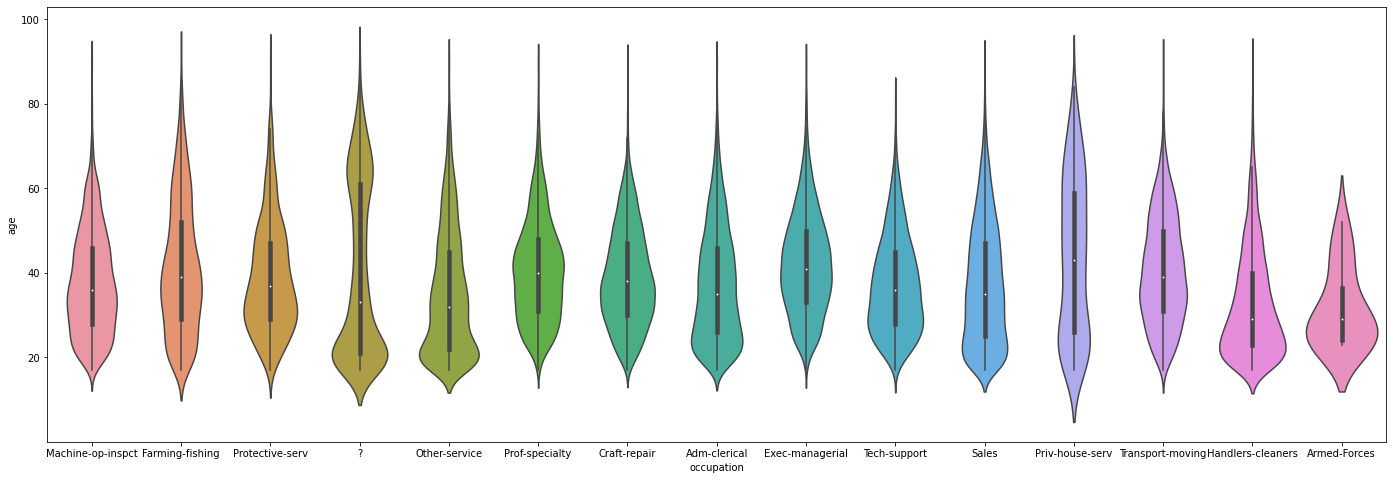

In [ ]:
plt.figure(figsize=(24,8))
sns.violinplot(x='occupation',y='age',data=data )

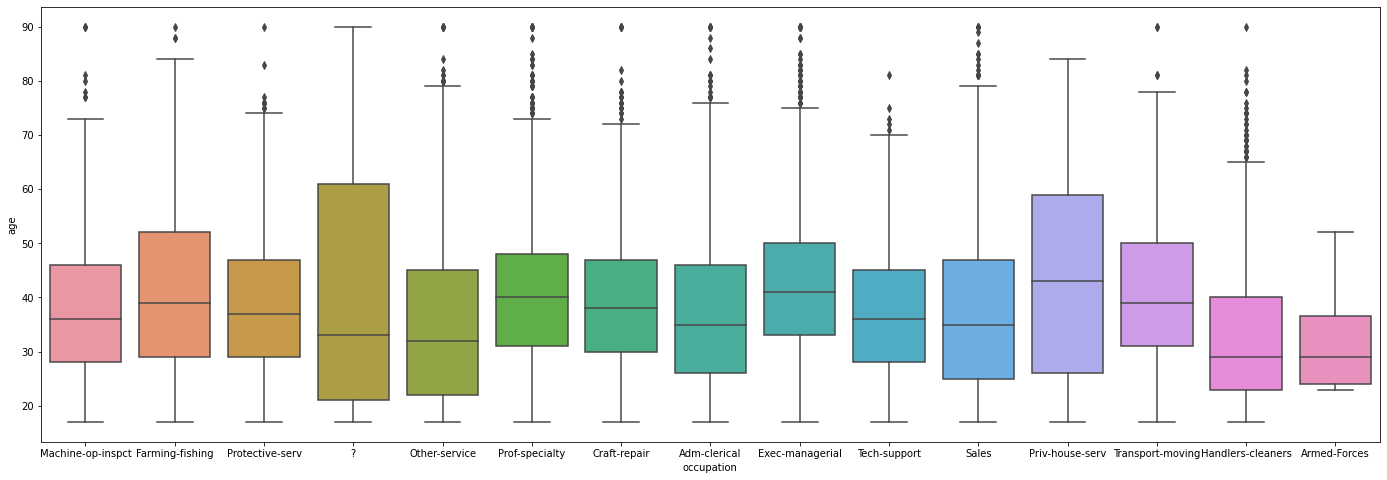

In [ ]:
plt.figure(figsize=(24,8))
sns.boxplot(x='occupation',y='age',data=data )

* People till the age of 40 are doing something.
* There are outliers in each categories except priv- house-serv and armed forces.

RELATIONSHI VS AGE

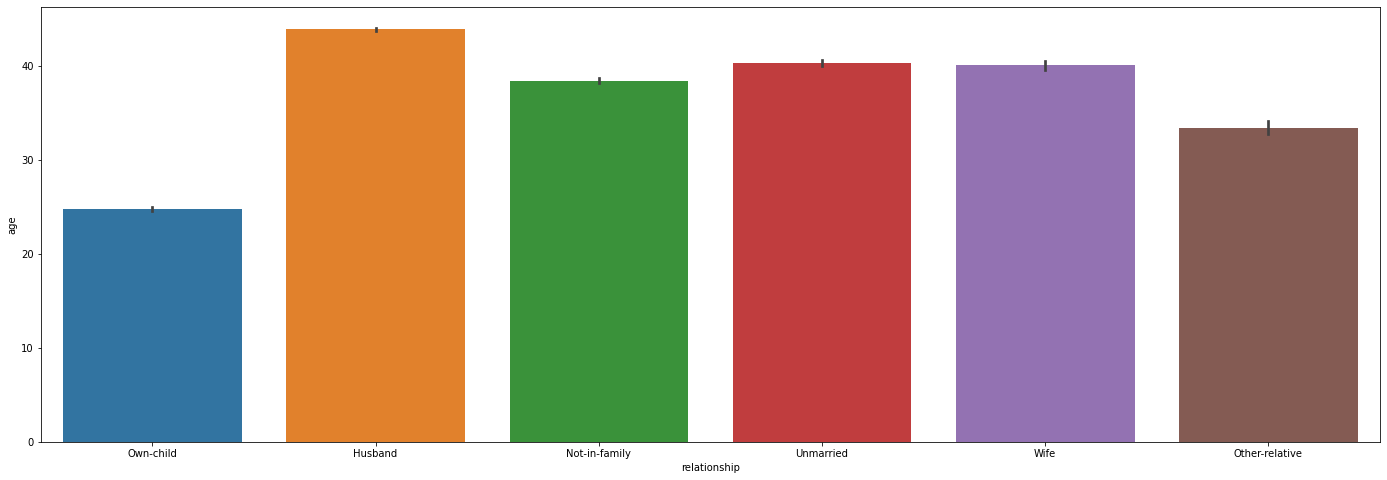

In [ ]:
plt.figure(figsize=(24,8))
sns.barplot(x='relationship',y='age',data=data )

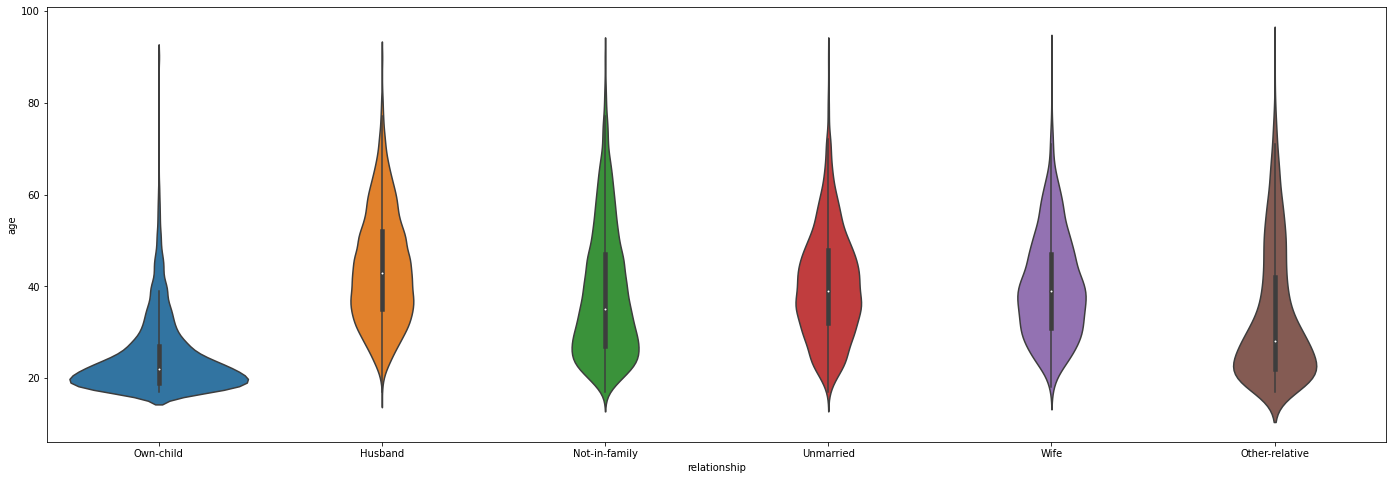

In [ ]:
plt.figure(figsize=(24,8))
sns.violinplot(x='relationship',y='age',data=data )

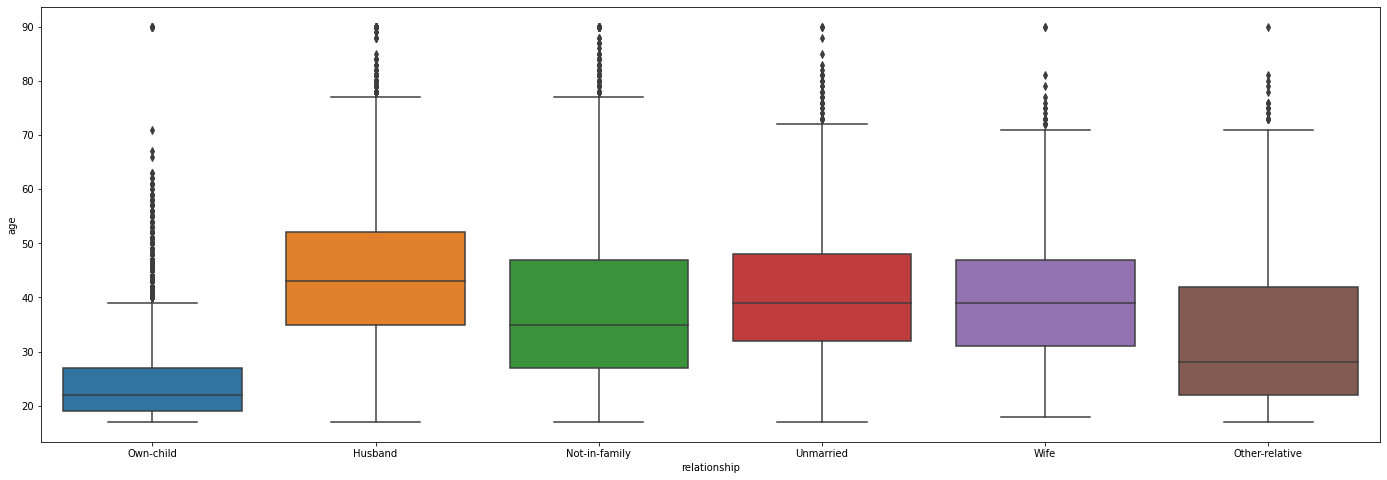

In [ ]:
plt.figure(figsize=(24,8))
sns.boxplot(x='relationship',y='age',data=data )

* Men are becoming husbands  after 40.
* Women are becoming wife after 35.
* Outliers are there.

RACE VS AGE

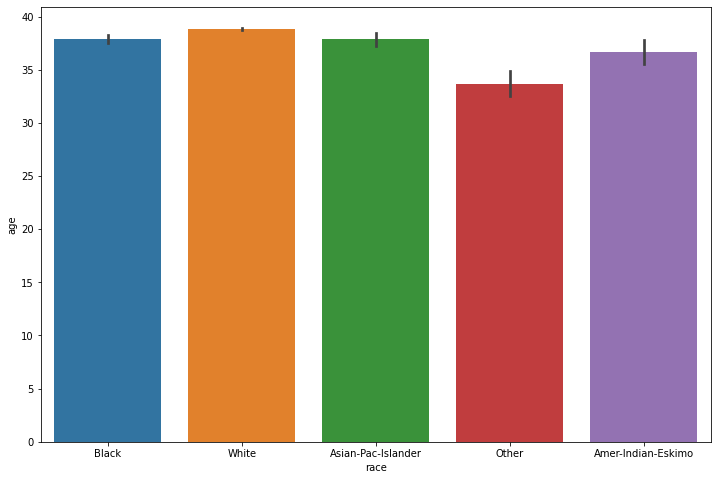

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='race',y='age',data=data)

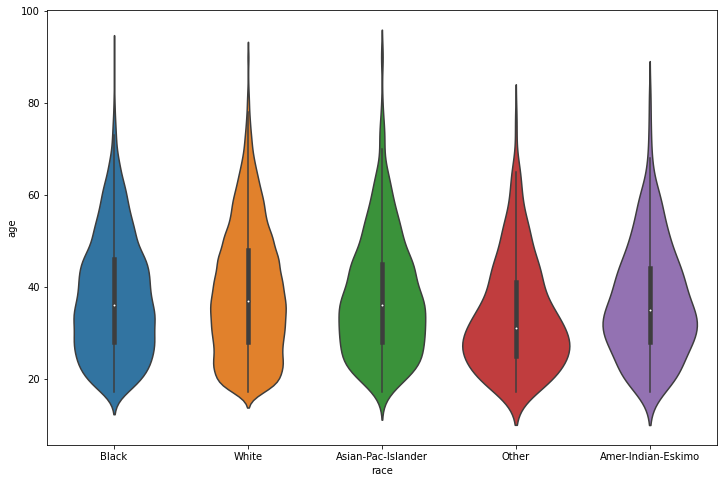

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='race',y='age',data=data)

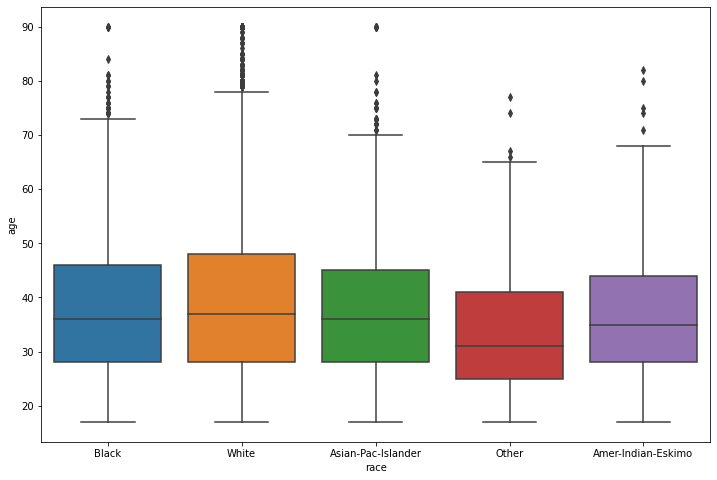

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='race',y='age',data=data)

Outliers are there.

GENDER VS AGE

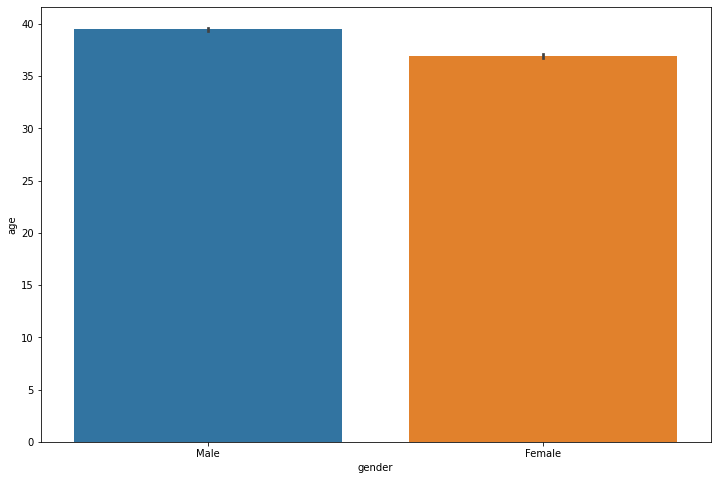

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='gender',y='age',data=data)

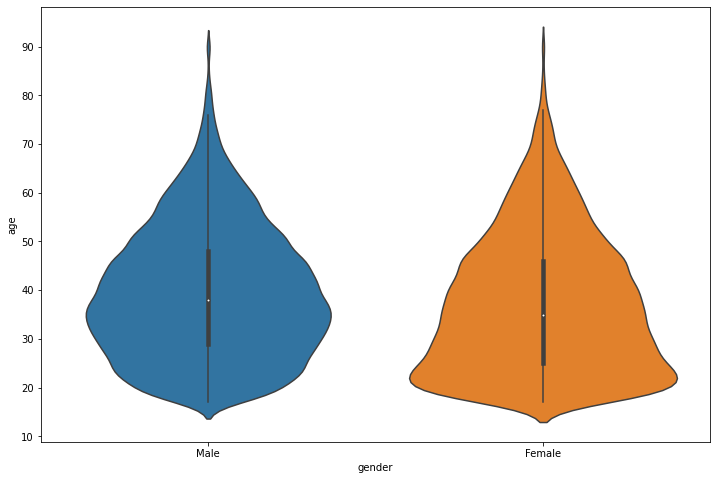

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='gender',y='age',data=data)

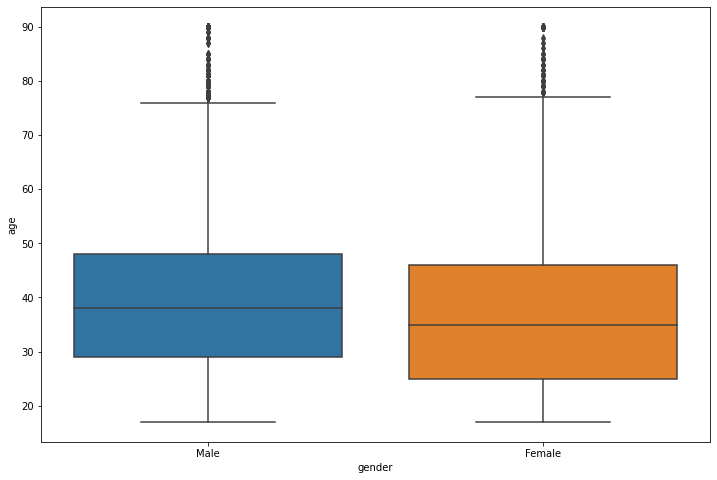

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='gender',y='age',data=data)

* Outliers are there.

EDUCATION VS HOURS PER WEEK

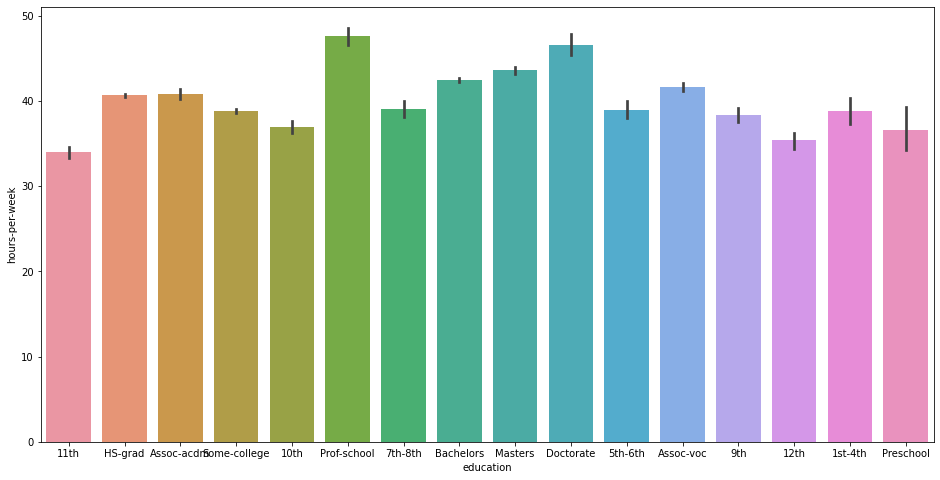

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='education',y='hours-per-week',data=data)

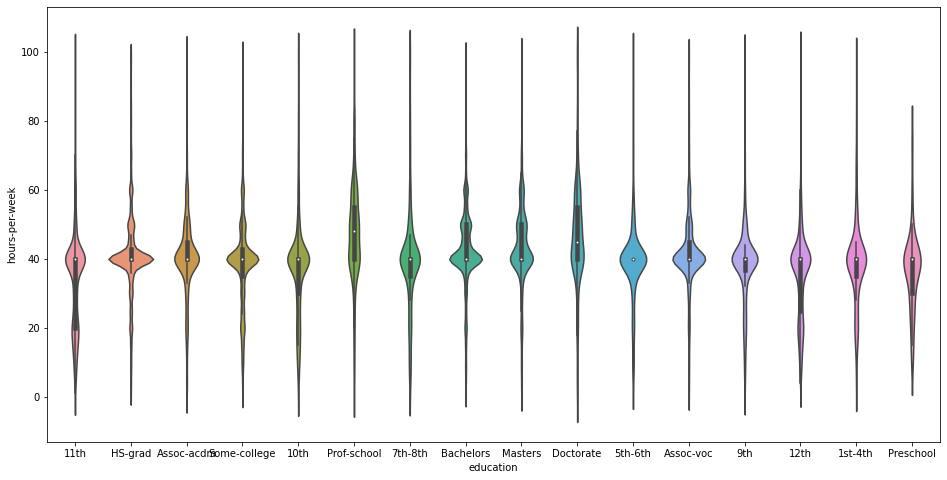

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x='education',y='hours-per-week',data=data)

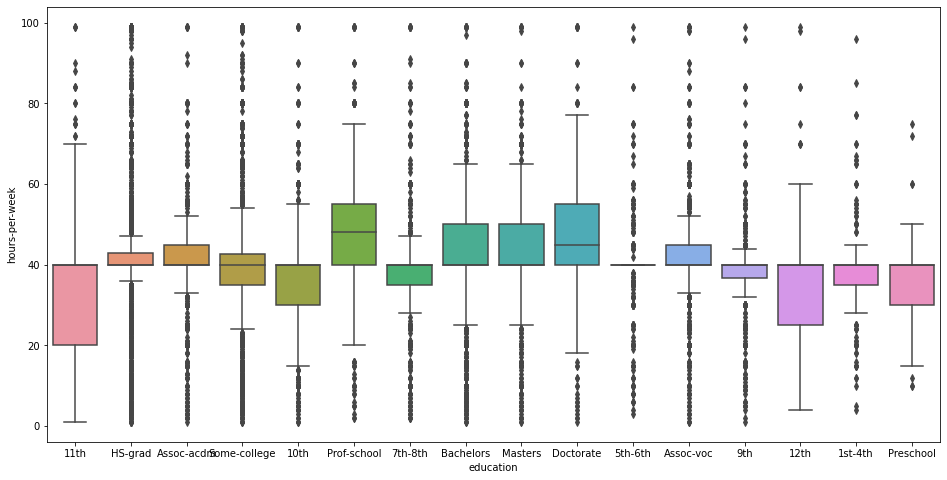

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='education',y='hours-per-week',data=data)

* So prof-school is giving more hours -per week.
* Followed by Doctrate.
* outliers are there.

Occupation vs hours per week

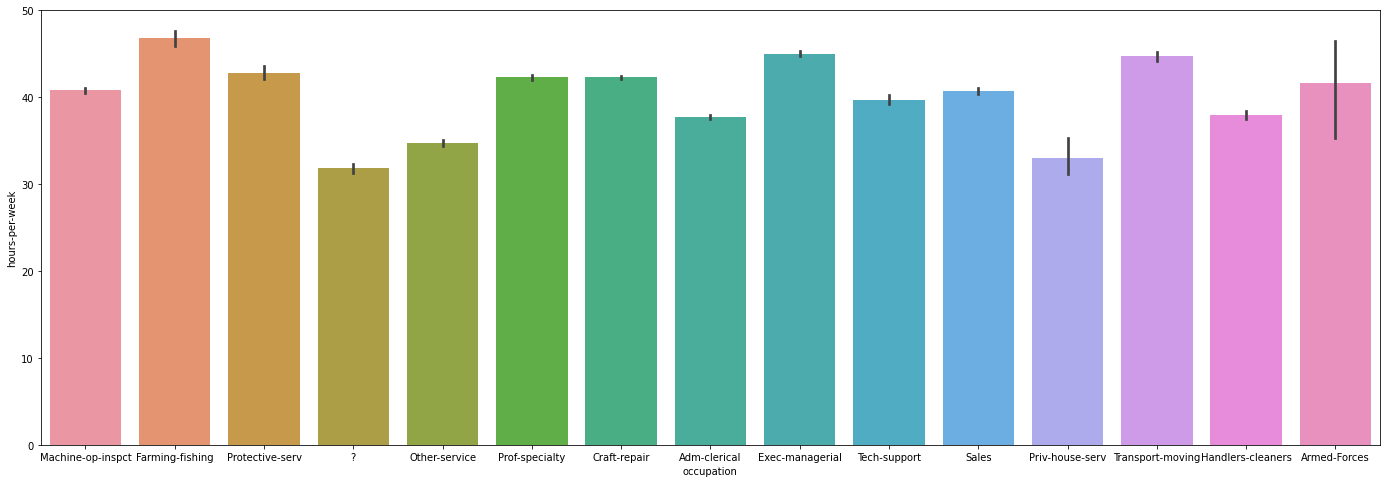

In [ ]:
plt.figure(figsize=(24,8))
sns.barplot(x='occupation',y='hours-per-week',data=data)

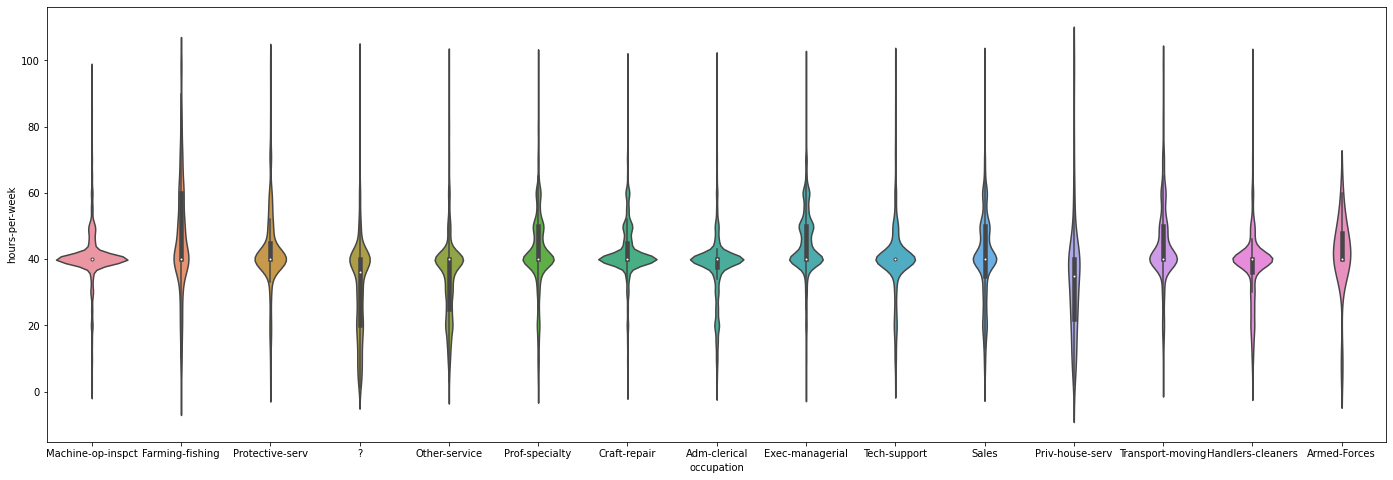

In [ ]:
plt.figure(figsize=(24,8))
sns.violinplot(x='occupation',y='hours-per-week',data=data)

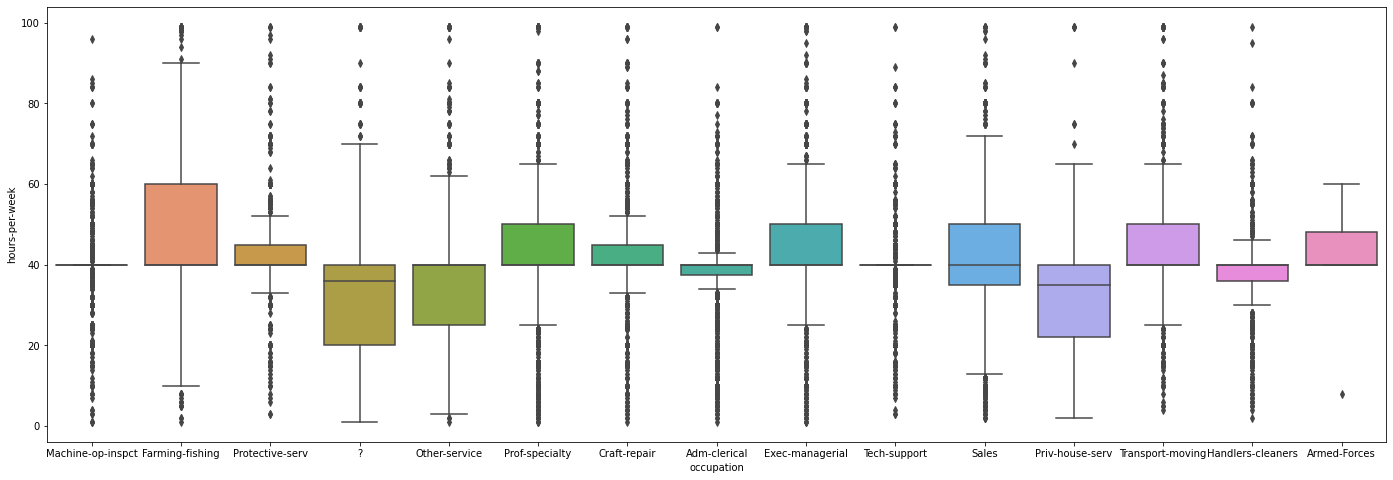

In [ ]:
plt.figure(figsize=(24,8))
sns.boxplot(x='occupation',y='hours-per-week',data=data)

* A person who is in Fishing - farming occupation is spending more hours.
* Outliers are there.

GENDER VS HOURS -PER-WEEK

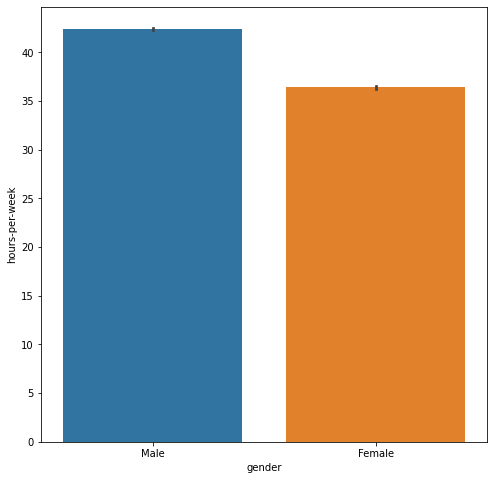

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='gender',y='hours-per-week',data=data)

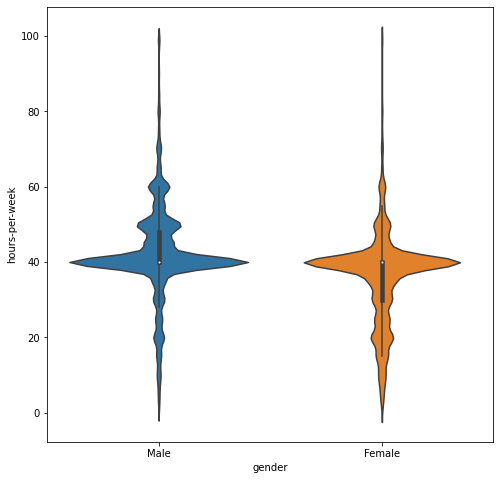

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(x='gender',y='hours-per-week',data=data)

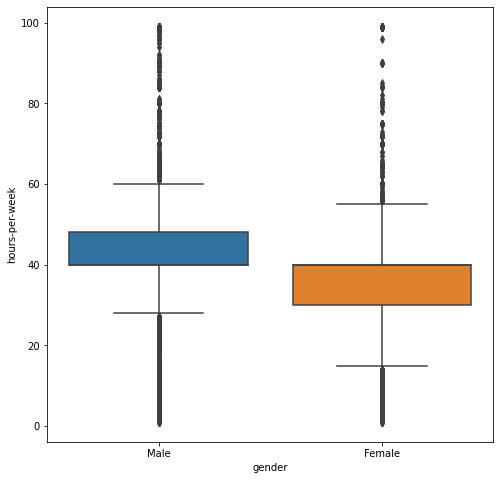

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='gender',y='hours-per-week',data=data)

* Male are spending more hours than female.
* Outliers are present.

Workclass vs Hours per week

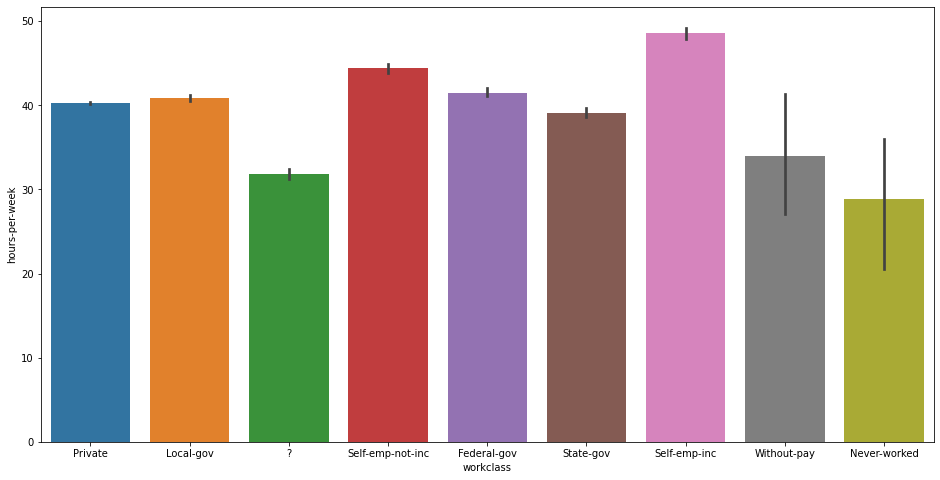

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='workclass',y='hours-per-week',data=data)

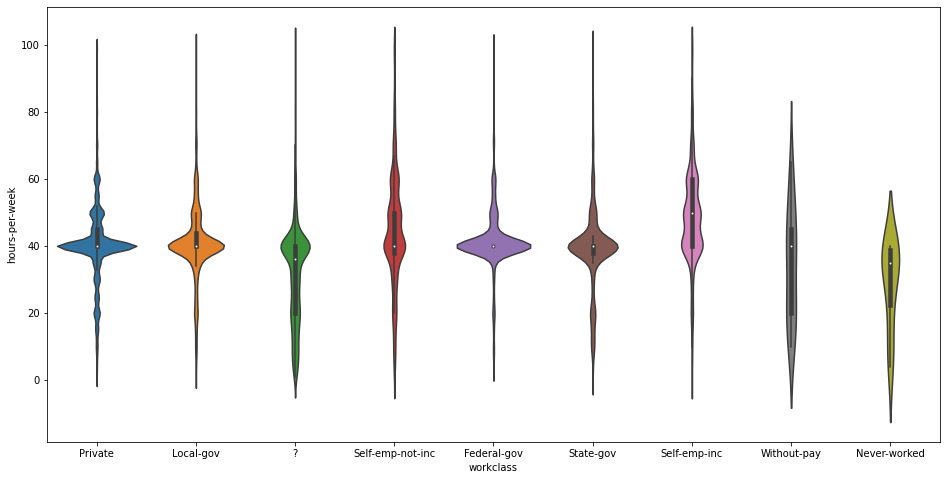

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x='workclass',y='hours-per-week',data=data)

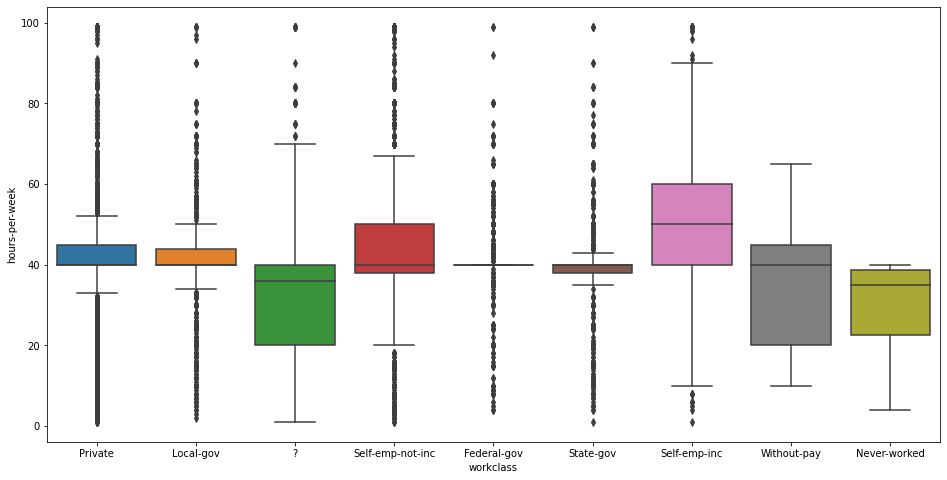

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='workclass',y='hours-per-week',data=data)

* Self employed people are spending more hours.
* Outliers are there.

WORKCLASS VS CAPITAL-GAIN

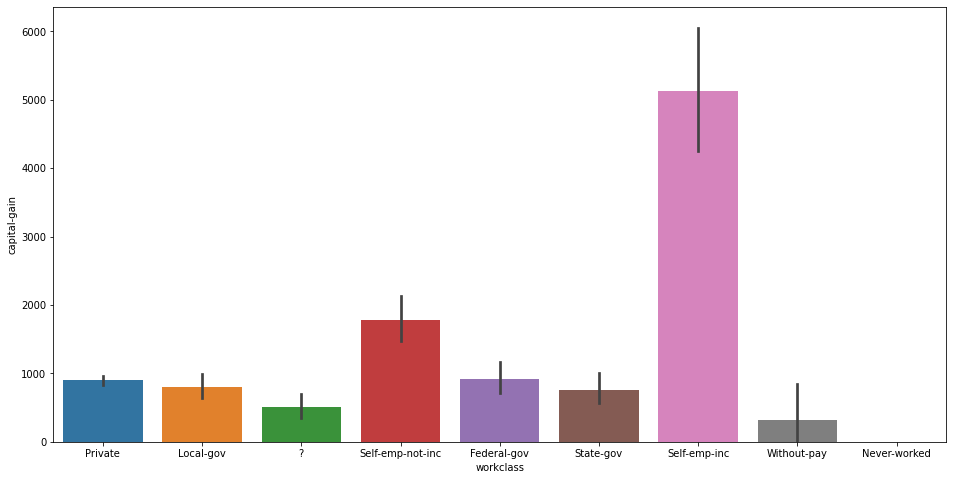

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='workclass',y='capital-gain',data=data)

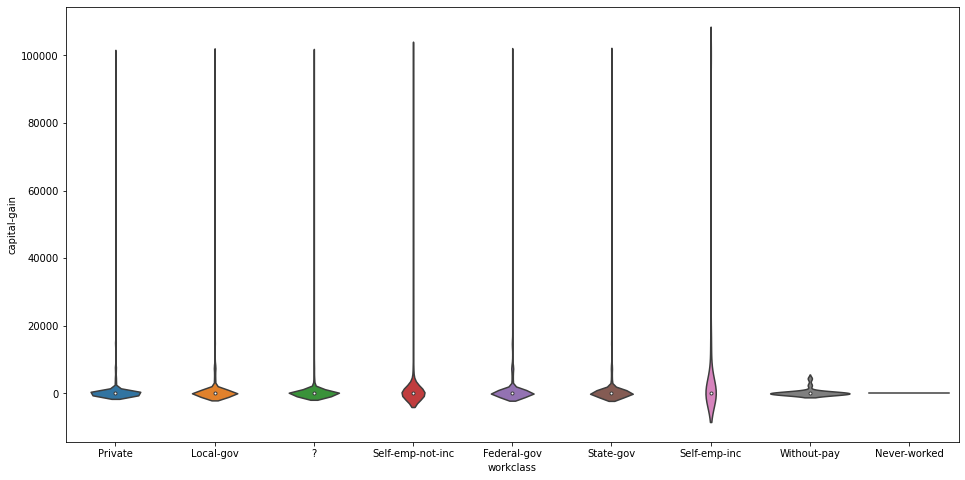

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x='workclass',y='capital-gain',data=data)

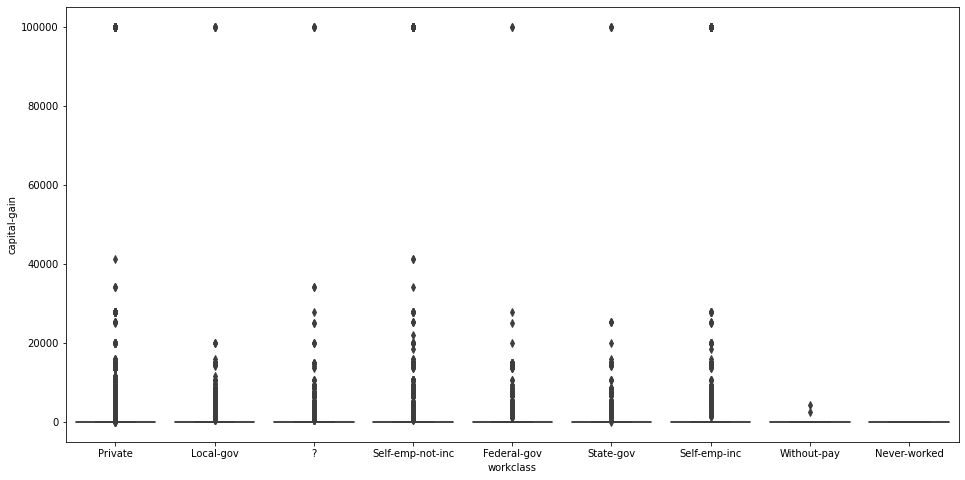

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='workclass',y='capital-gain',data=data)

* Self-emp-inc have more capital gain.
* Never- worked has no capital-gain as expected.
* Outliers are there.

EDUCATION VS CAPITAL-GAIN

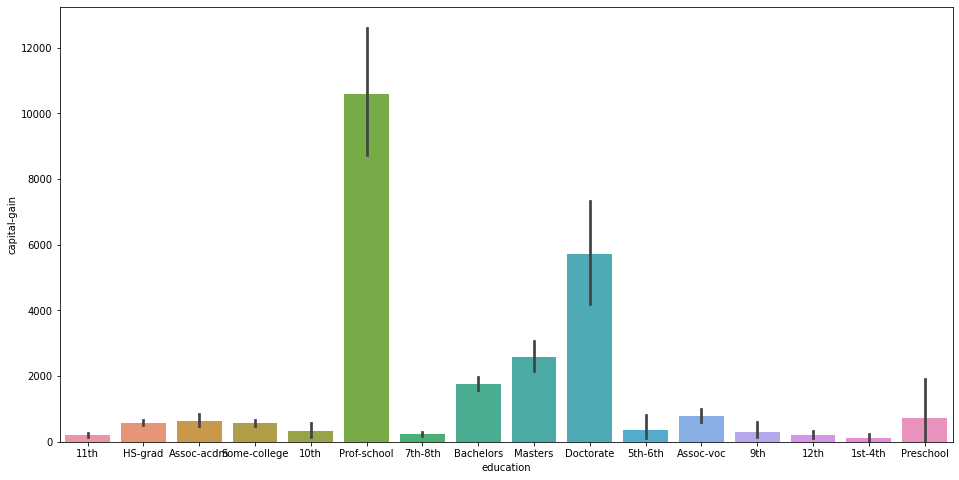

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='education',y='capital-gain',data=data)

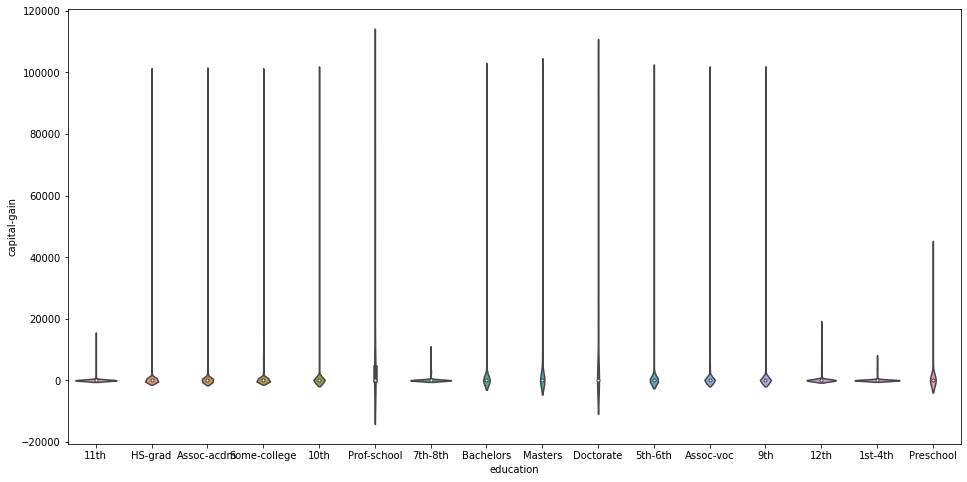

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x='education',y='capital-gain',data=data)

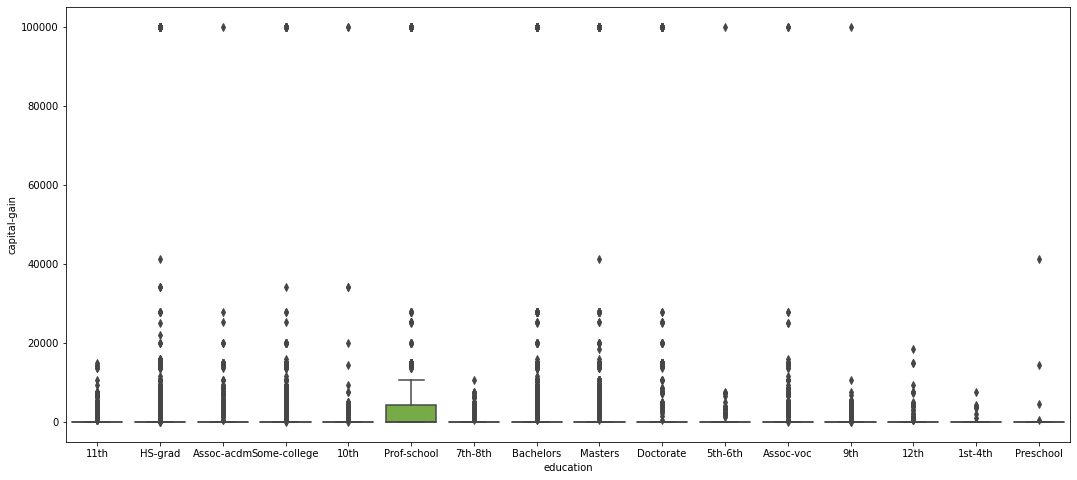

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(x='education',y='capital-gain',data=data)

* Prof-school qualified people have high capital gain.
* 1st- 2nd standard qualified people has min capital-gain.
* Outliers are there.

GENDER VS CAPITAL-GAIN

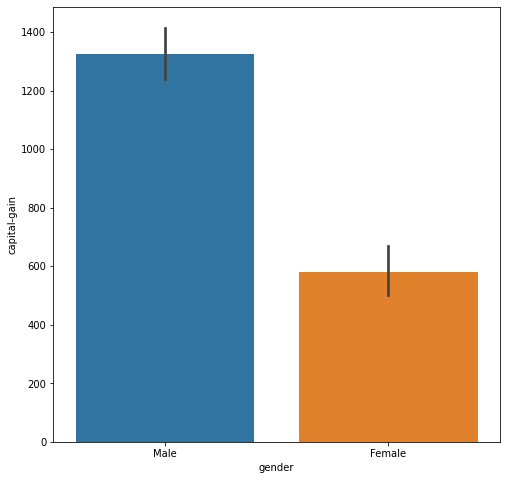

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='gender',y='capital-gain',data=data)

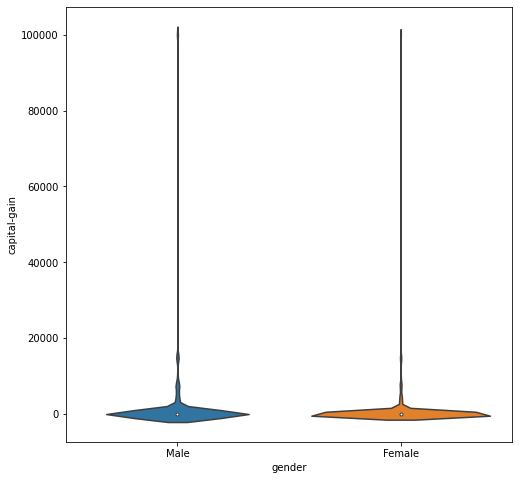

In [ ]:
plt.figure(figsize=(8,8))
sns.violinplot(x='gender',y='capital-gain',data=data)

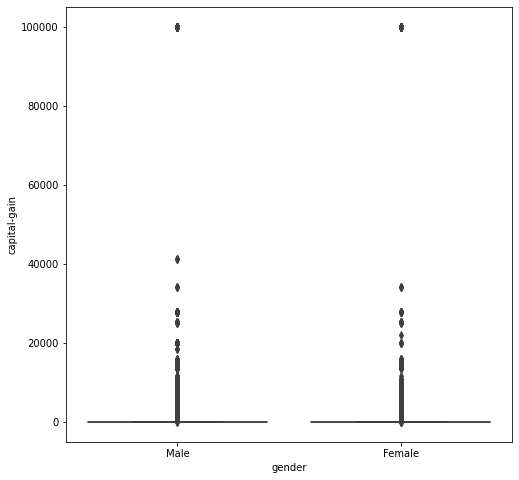

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='gender',y='capital-gain',data=data)

* Male are having high capital-gain.
* Outliers are there.

WORKCLASS VS CAPITAL-LOSS

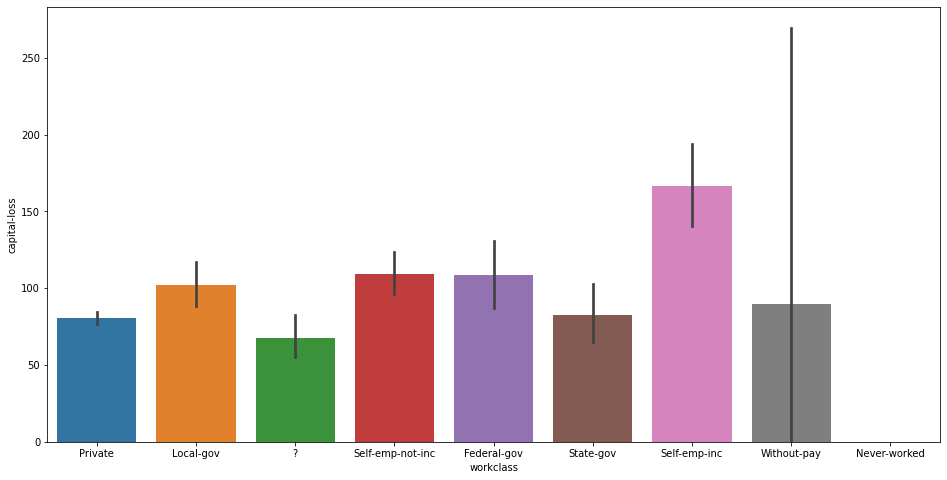

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='workclass',y='capital-loss',data=data)

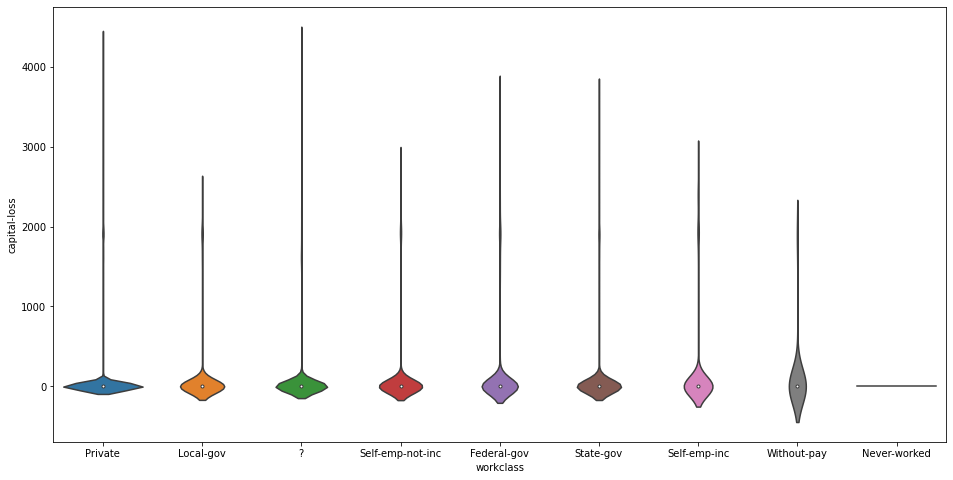

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x='workclass',y='capital-loss',data=data)

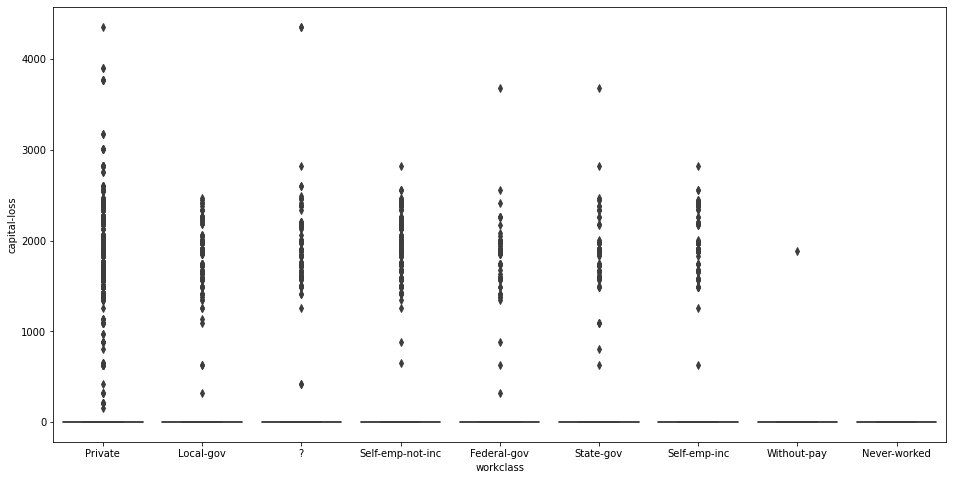

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='workclass',y='capital-loss',data=data)

* Here also capital-loss is from self-emp-inc.
* Never Worked people has no capital-loss

Education bs capital-loss

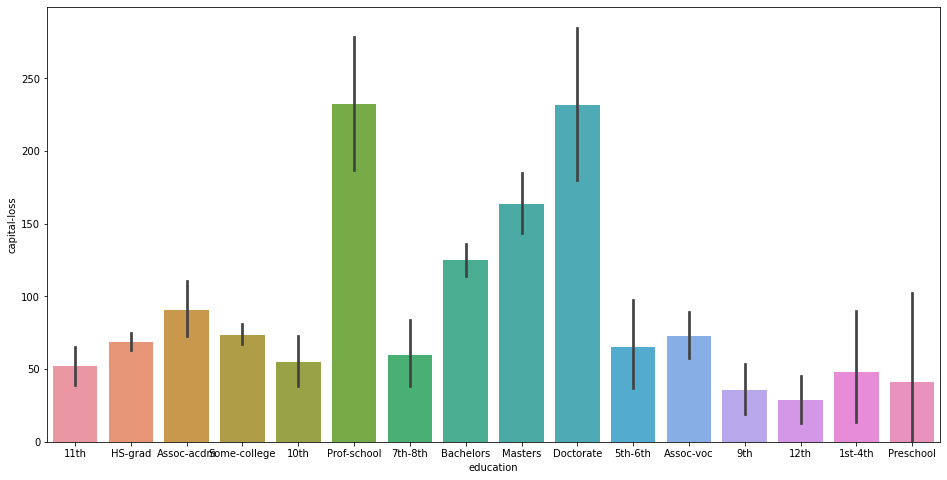

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='education',y='capital-loss',data=data)

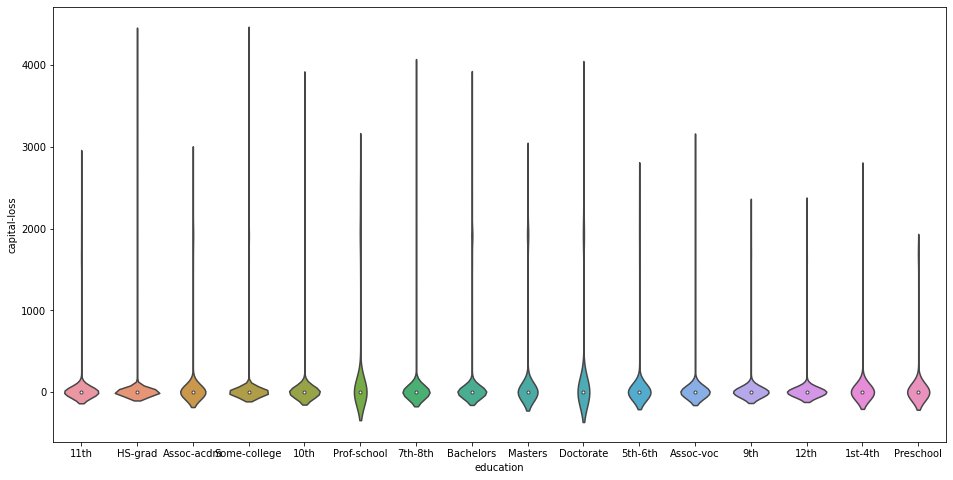

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x='education',y='capital-loss',data=data)

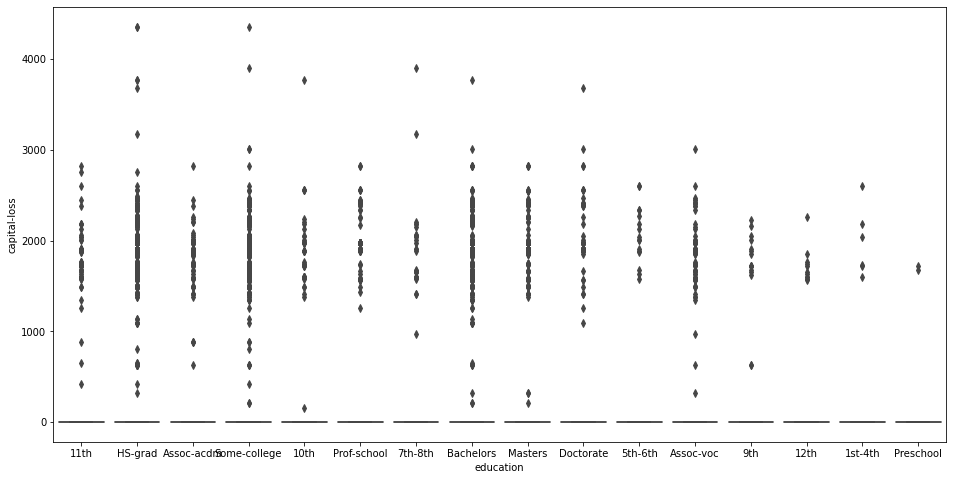

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='education',y='capital-loss',data=data)

* prof-school and doctorate have high capital-loss.
* outliers are there.

Occupation vs capital-loss

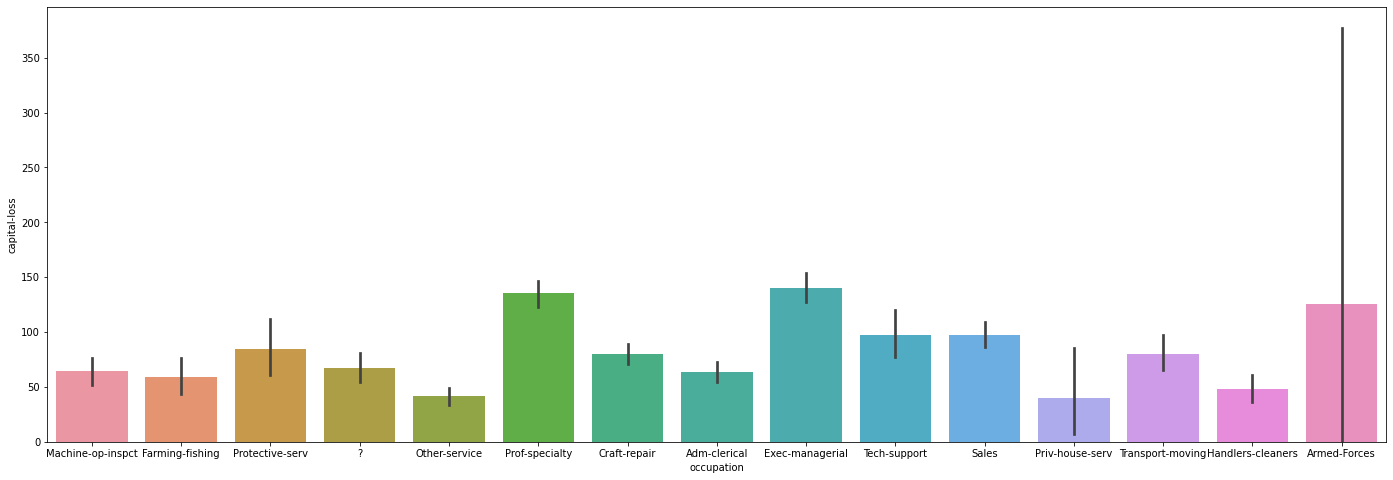

In [ ]:
plt.figure(figsize=(24,8))
sns.barplot(x='occupation',y='capital-loss',data=data)

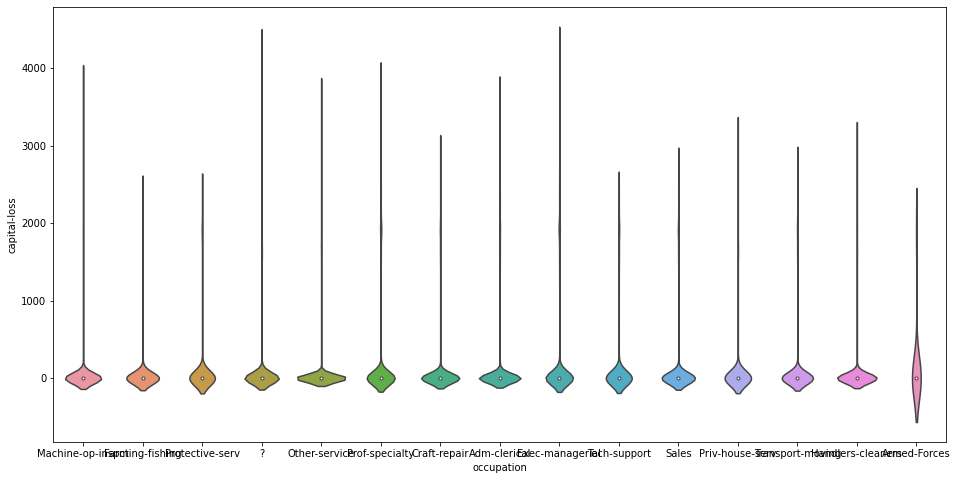

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x='occupation',y='capital-loss',data=data)

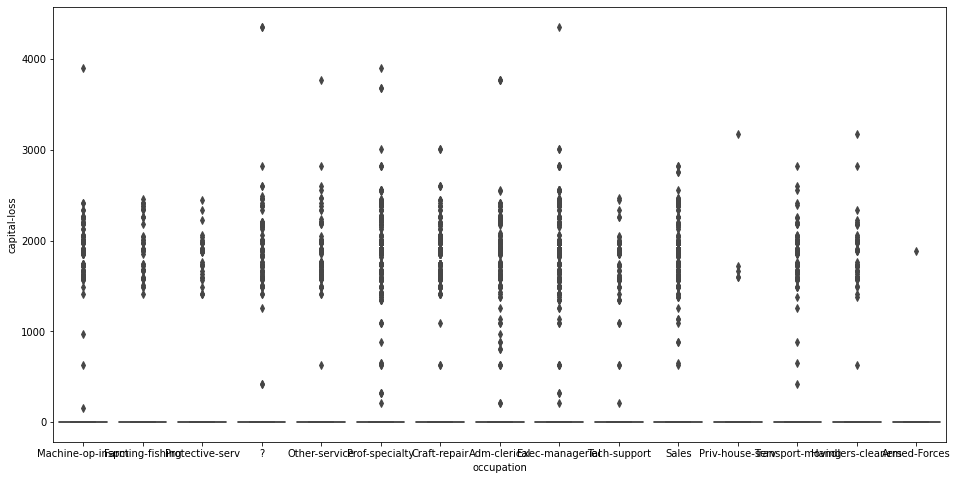

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='occupation',y='capital-loss',data=data)

* Outliers are there.
*  prof-speciality , exec-managerial and armed forces are having capital los.

CAPITAL LOSS VS GENDER

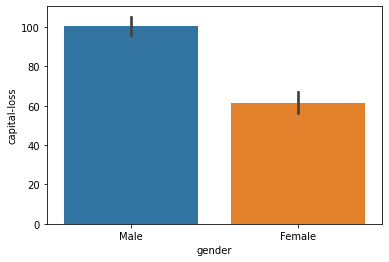

In [ ]:
sns.barplot(x='gender',y='capital-loss',data=data)

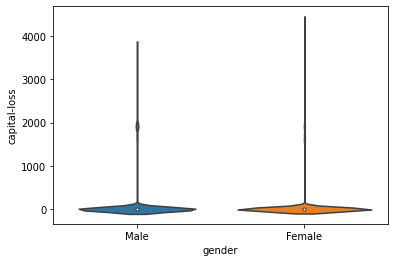

In [ ]:
sns.violinplot(x='gender',y='capital-loss',data=data)

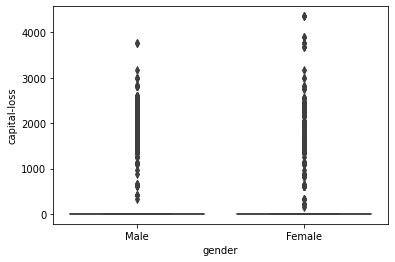

In [ ]:
sns.boxplot(x='gender',y='capital-loss',data=data)

* all results are same as capital gain.
* here also male is having more capital-loss

*Let's analyse how income is related with all other features.*

income vs age

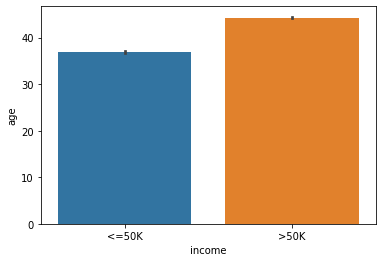

In [ ]:
sns.barplot(x='income',y='age',data=data)

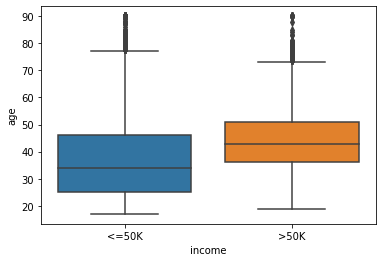

In [ ]:
sns.boxplot(x='income',y='age',data=data)

* People who are earning greater than 50k is above 40.
* People who are earning less than or equal to 50k is above 35 and below 40.
* Outliers are present in both the income group.

Hours -per - week vs income

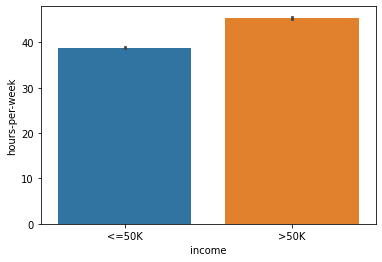

In [ ]:
sns.barplot(x='income',y='hours-per-week',data=data)

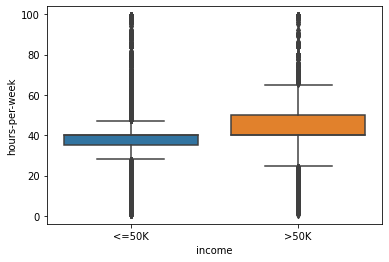

In [ ]:
sns.boxplot(x='income',y='hours-per-week',data=data)

* People who are earning more than 50k are spending more working hours.
* Outliers are present in both groups in max and min regions. 

Income vs capital-gain

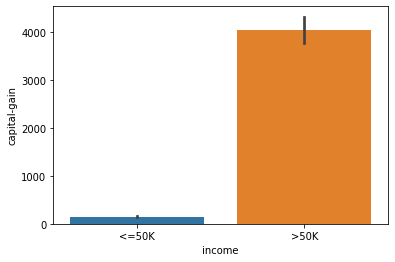

In [ ]:
sns.barplot(x='income',y='capital-gain',data=data)

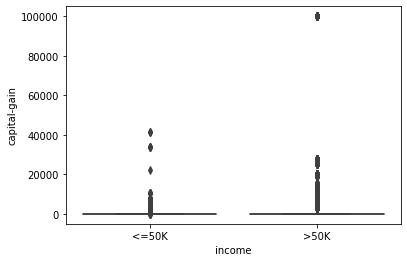

In [ ]:
sns.boxplot(x='income',y='capital-gain',data=data)

* Capital-gain is high for the people who is earning more than 50k.
* Most of the capital-gain is accumulated at 0.

Income vs capital-loss

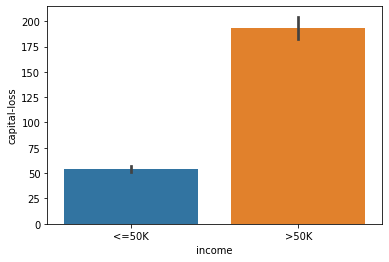

In [ ]:
sns.barplot(x='income',y='capital-loss',data=data)

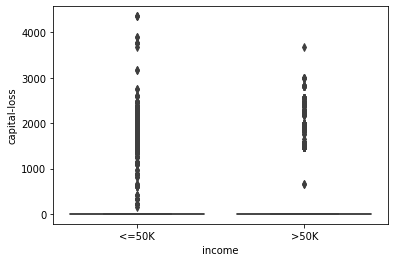

In [ ]:
sns.boxplot(x='income',y='capital-loss',data=data)

Similar to capital-gain

Income vs workclass

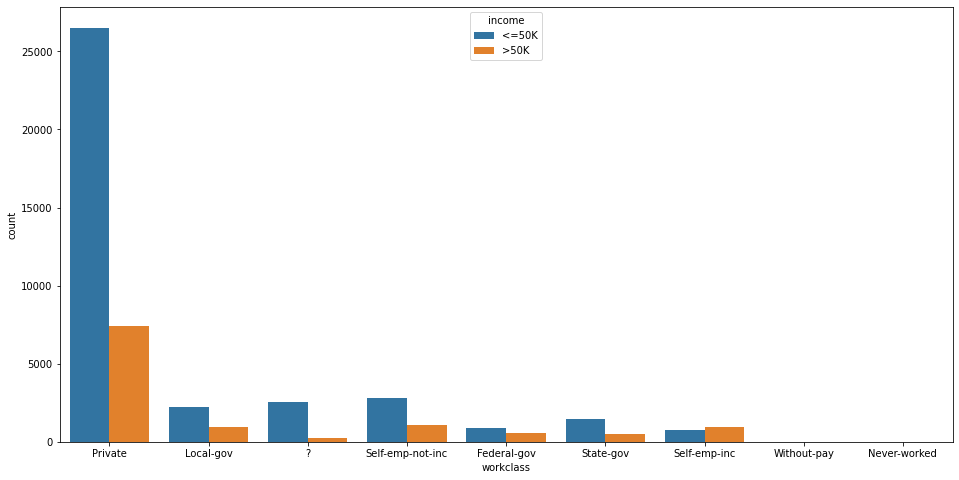

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(hue='income',x='workclass',data=data)

* all workclass people mostly earn less than or equal to 50k except self-emp-inc who earns greather than 50k more as compared to less than or equal to 50k.

Income vs education

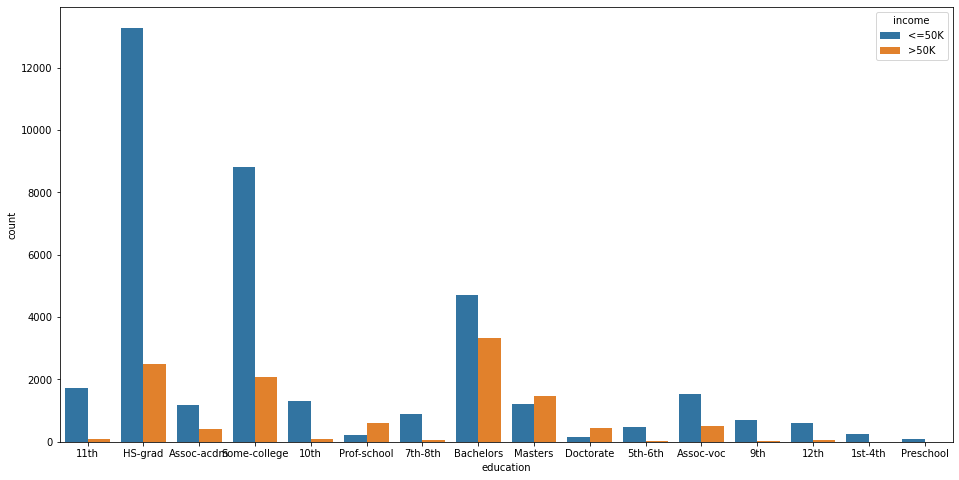

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(hue='income',x='education',data=data)

* Most of the people are qualified  as HS-grad but they earn mostly less than or equal to 50k.
* People who are pre-school qualified are less in number as well as all are earning less than or equal to 50k. People are less qualified earn less.
* Bachelors , masters , Doctrate people are earning more than 50k is max count can say if people are more qualified they earn more.

Income vs occupation

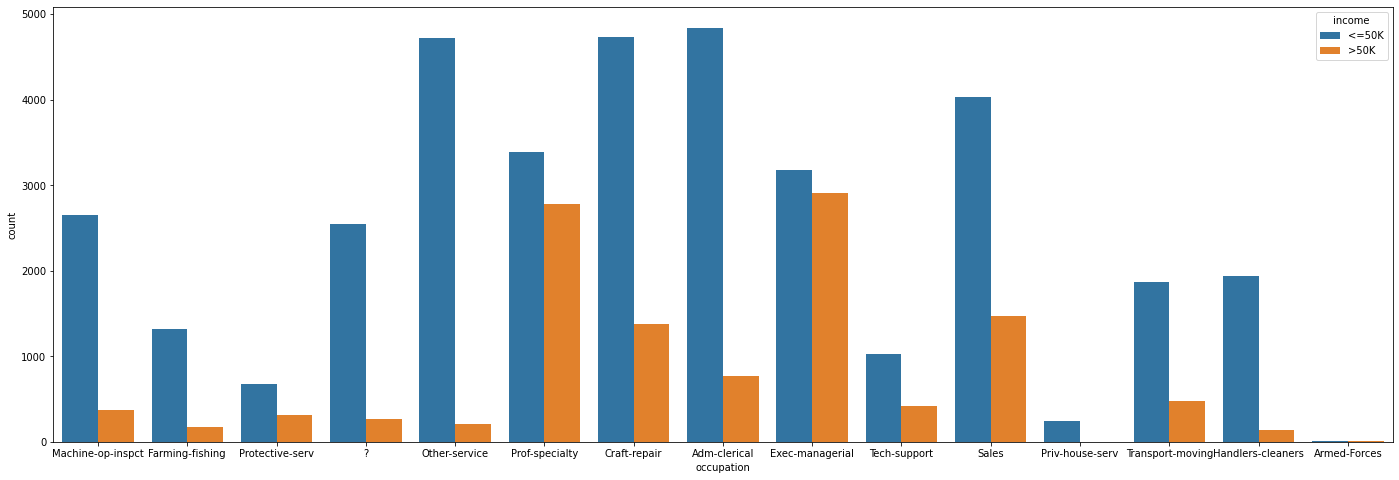

In [ ]:
plt.figure(figsize=(24,8))
sns.countplot(hue='income',x='occupation',data=data)

* Can see that executive-managerial and prof - speciality have more count of people earning >50k telling us that good occupation leads to more income.
* Armed-Forces have very less number of people earning in both the income-groups.

Income vs relationship

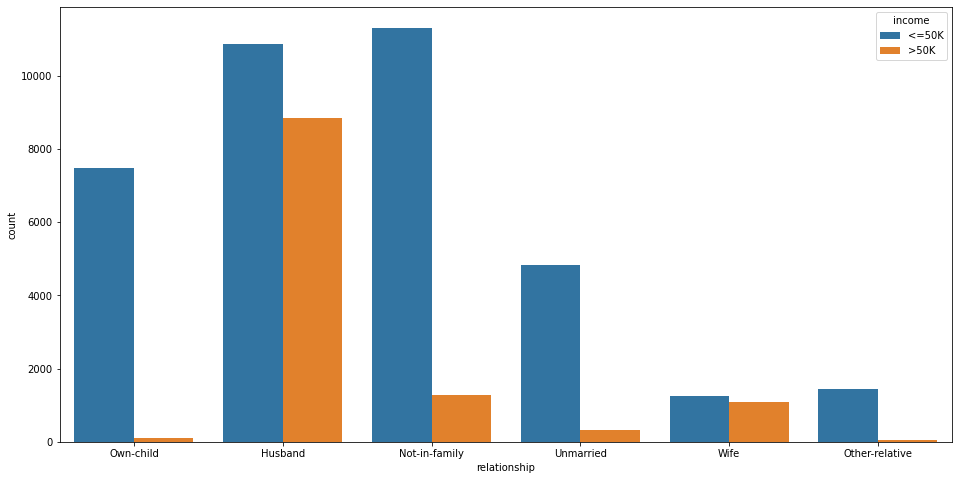

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(hue='income',x='relationship',data=data)

* Husbands has higher count of earning >50k.
* Own-child,other relative am\nd unmarried have very less people who earn >50k
* Not in family most of the people earn <=50k

Income vs marital-status

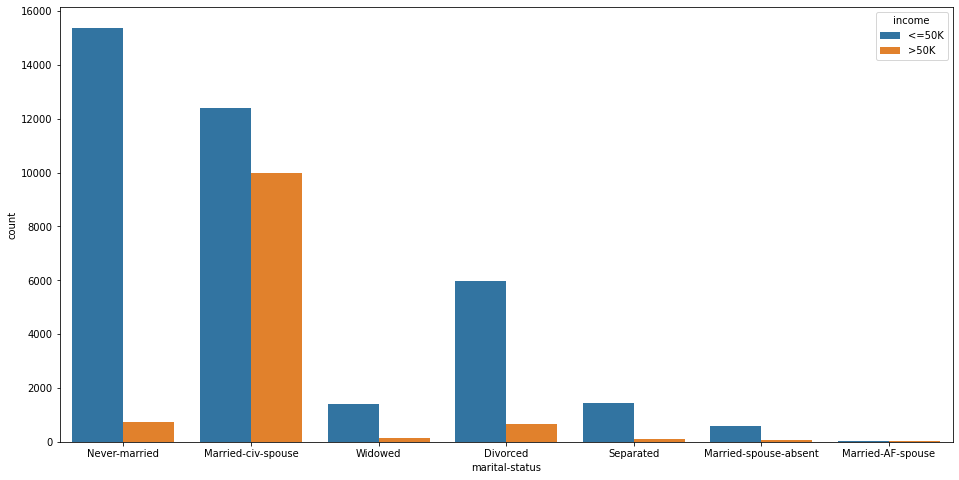

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(hue='income',x='marital-status',data=data)

* Married-civ-spouse has higher count of people earning more than 50k.
* Never married, divorced, separated, married-spouse-absent have very less people who earn >50.
* There is minimal people who are earning >50k or <=50k in married af spouse.

Income vs gender

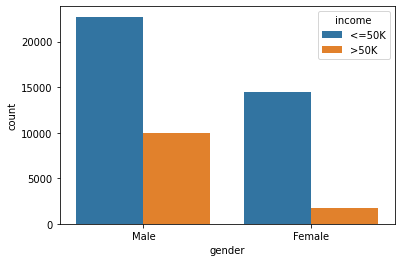

In [ ]:
sns.countplot(hue='income',x='gender',data=data)

* Female have less count of both >50k and <=50k earning as compared to male.
* There is very less female who earn >50k.


##Checking the missing values and treating the outlier## 

In [ ]:
#Step-1 -> Check how many columns have '?'
columns= data.columns
d = data.shape[0]
for c in columns:
  no_value = data[c].isin(['?']).sum() 
  if no_value > 0:
    print(c)
    print(no_value)
    print("{0:.2f}%".format((float(no_value)/d*100)))
    print("\n ")


workclass
2799
5.73%

 
occupation
2809
5.75%

 
native-country
857
1.75%

 


In [ ]:
# Step - 2 --> We will try to change '?' to most freq value

frequent,times = np.unique(data['workclass'], return_counts=True)
most_freq_value = frequent[np.argmax(times,axis=0)]
data['workclass'][data['workclass'] == '?'] = most_freq_value

frequent,times = np.unique(data['occupation'], return_counts=True)
most_freq_value = frequent[np.argmax(times,axis=0)]
data['occupation'][data['occupation'] == '?'] = most_freq_value

frequent,times = np.unique(data['native-country'], return_counts=True)
most_freq_value = frequent[np.argmax(times,axis=0)]
data['native-country'][data['native-country'] == '?'] = most_freq_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
data.head(8)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K


In [ ]:
#convert categorical data into numerical data
df = data.copy()
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

col = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
for i in col:
  df[i] = LabelEncoder().fit_transform(df[i])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,<=50K
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,<=50K
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,>50K
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,>50K
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,<=50K


Removing outliers

In [ ]:
Q1= np.percentile(df['age'],25,interpolation='midpoint')
Q3= np.percentile(df['age'],75,interpolation='midpoint')
IQR = Q3-Q1
print("Old shape ",df.shape)
upper= np.where(df['age'] >=(Q3+ 1.5*IQR))
lower= np.where(df['age'] <=(Q1- 1.5*IQR))

df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)


print("New shape ",df.shape)

Old shape  (48842, 15)
New shape  (48592, 15)


In [ ]:
# Writing for each column is very cumbersome task let's make a function for removing outliers
def drop_outliers(df,col):
  Q1= df[col].quantile(0.25)
  Q3= df[col].quantile(0.75)
  IQR = Q3-Q1
  df.drop(df[df[col]>(IQR + Q3)].index,inplace=True)
  df.drop(df[df[col]<(IQR - Q1)].index,inplace=True)
#Remove outliers of fnlwgt
drop_outliers(df,'fnlwgt')

df.shape

(45350, 15)

In [ ]:
#Remove outliers of Hours-per-week
drop_outliers(df,'hours-per-week')

df.shape

(40231, 15)

In [ ]:
#Remove outliers of capital-gain
drop_outliers(df,'capital-gain')
df.shape

(37112, 15)

In [ ]:
#Remove outliers of capital-loss
drop_outliers(df,'capital-loss')
df.shape

(35317, 15)

In [ ]:
#Remove outliers of educational-num column
drop_outliers(df,'educational-num')
df.shape

(33052, 15)

In [ ]:
#Succesfully converted all categorical data into numerical data
from sklearn.preprocessing import StandardScaler

X= df.iloc[:,0:14]
y = df['income']
X = StandardScaler().fit_transform(df.iloc[:,0:14])
df['income'] = df['income'].map({'<=50K':0,'>50K':1, '<=50K.':0,'>50K.':1})

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0
5,34,3,198693,0,6,4,7,1,4,1,0,0,30,38,0


age                   AxesSubplot(0.125,0.799681;0.110714x0.0803191)
workclass          AxesSubplot(0.257857,0.799681;0.110714x0.0803191)
fnlwgt             AxesSubplot(0.390714,0.799681;0.110714x0.0803191)
education          AxesSubplot(0.523571,0.799681;0.110714x0.0803191)
educational-num    AxesSubplot(0.656429,0.799681;0.110714x0.0803191)
marital-status     AxesSubplot(0.789286,0.799681;0.110714x0.0803191)
occupation            AxesSubplot(0.125,0.703298;0.110714x0.0803191)
relationship       AxesSubplot(0.257857,0.703298;0.110714x0.0803191)
race               AxesSubplot(0.390714,0.703298;0.110714x0.0803191)
gender             AxesSubplot(0.523571,0.703298;0.110714x0.0803191)
capital-gain       AxesSubplot(0.656429,0.703298;0.110714x0.0803191)
capital-loss       AxesSubplot(0.789286,0.703298;0.110714x0.0803191)
hours-per-week        AxesSubplot(0.125,0.606915;0.110714x0.0803191)
native-country     AxesSubplot(0.257857,0.606915;0.110714x0.0803191)
income             AxesSubplot(0.3

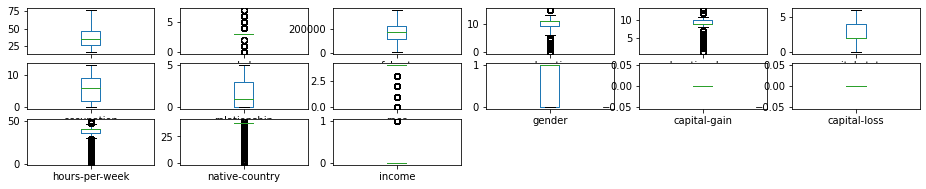

In [ ]:
df.plot(kind='box',figsize=(16,8),layout=(8,6),subplots=True)

Removed outliers successfully!!..

**MODEL BUILDING**

WE CAN SEE HERE THAT WE HAVE TO PREDICT INCOME THAT COMES IN TWO CLASS SO IT IS SUPERVISED BINARY CLASSIFICATION

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Creating Logistic regression model
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state=0)
#classifier.fit(X_train,y_train)

#Creating a k nearest neibour(knn) model
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#classifier.fit(X_train,y_train)

#Creating Svm model
#from sklearn.svm import SVC
#classifier = SVC(kernel='linear',random_state=0)
#classifier.fit(X_train,y_train)

#Creating Decision Tree model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#Prediction y value
y_pred = classifier.predict(X_test)

In [ ]:
#Creating confusion-matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5038  560]
 [ 585  428]]


In [ ]:
# Calculation of accuracy and standard deviation using  k- fold cross validation  here k is 10
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy : {:.2f}%".format(accuracy.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracy.std()*100))

Accuracy : 82.33%
Standard Deviation : 0.52%


**KNN Model**

Accuracy :- 87.74%

Standard deviation :- 0.58%

---
**LOGISTIC Model**

Accuracy :- 87.62%

Standard Deviation :- 0.30%

---
**SVM Model**

Accuracy :- 87.67%

Standard Deviation :- 0.02%

---
**Decision Tree Model**

Accuracy :- 84.84%

Standard Deviation :- 0.50%













Can see the best model for our dataset is KNN MODEL with 87.74% accuracy.